In [140]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns
# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm


# Load Provided Data

In [2]:
edgap = pd.read_excel(
    'https://raw.githubusercontent.com/brian-fischer/DATA-5100/main/EdGap_data.xlsx'
    ,dtype={'NCESSCH School ID': object})

C:\Users\brisa\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
school_info = pd.read_csv(r'C:\Users\brisa\Documents\0 Seattle U\DATA 5100 Foundations\education\data\ccd_sch_029_1617_w_1a_11212017.csv'
                         ,encoding='unicode_escape')

C:\Users\brisa\AppData\Local\Temp\ipykernel_36640\1003416712.py:1: DtypeWarning: Columns (6,9,14,15,18,19,21,22,25,26,29,31,35,39,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  school_info = pd.read_csv(r'C:\Users\brisa\Documents\0 Seattle U\DATA 5100 Foundations\education\data\ccd_sch_029_1617_w_1a_11212017.csv'


# Load Extra Data

In [4]:
higher_ed_locations = pd.read_csv('https://github.com/brisamh/education/raw/refs/heads/main/data/hd2017.csv', encoding="latin1")

In [5]:
referrals_arrest = pd.read_csv('https://github.com/brisamh/education/raw/refs/heads/main/data/CRDC_Referrals_Arrests.csv')

C:\Users\brisa\AppData\Local\Temp\ipykernel_36640\1635643906.py:1: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  referrals_arrest = pd.read_csv('https://github.com/brisamh/education/raw/refs/heads/main/data/CRDC_Referrals_Arrests.csv')


In [6]:
referrals_arrest.head()

LEA_STATE LEA_STATE_NAME   LEAID                LEA_NAME  SCHID  \
0        AL        ALABAMA  100002  Alabama Youth Services   1017   
1        AL        ALABAMA  100002  Alabama Youth Services   1017   
2        AL        ALABAMA  100002  Alabama Youth Services   1018   
3        AL        ALABAMA  100002  Alabama Youth Services   1999   
4        AL        ALABAMA  100005        Albertville City   1008   

                        SCH_NAME     COMBOKEY   JJ  SCH_DISCWODIS_REF_HI_M  \
0  Wallace Sch - Mt Meigs Campus  10000201705  Yes                      -9   
1      McNeel Sch - Vacca Campus  10000201706  Yes                      -9   
2         Alabama Youth Services  10000201876   No                       0   
3                 AUTAUGA CAMPUS  10000299995  Yes                      -9   
4      Albertville Middle School  10000500870   No                       0   

   SCH_DISCWODIS_REF_HI_F  ...  SCH_DISCWDIS_ARR_IDEA_WH_M  \
0                      -9  ...                          -9   
1                      -9  ...                          -9   
2                       0  ...                           0   
3                      -9  ...                          -9   
4                       0  ...                           0   

   SCH_DISCWDIS_ARR_IDEA_WH_F  SCH_DISCWDIS_ARR_IDEA_TR_M  \
0                          -9                          -9   
1                          -9                          -9   
2                           0                           0   
3                          -9                          -9   
4                           0                           0   

   SCH_DISCWDIS_ARR_IDEA_TR_F  TOT_DISCWDIS_ARR_IDEA_M  \
0                          -9                       -9   
1                          -9                       -9   
2                           0                        0   
3                          -9                       -9   
4                           0                        0   

   TOT_DISCWDIS_ARR_IDEA_F  SCH_DISCWDIS_ARR_LEP_M  SCH_DISCWDIS_ARR_LEP_F  \
0                       -9                      -9                      -9   
1                       -9                      -9                      -9   
2                        0                       0                       0   
3                       -9                      -9                      -9   
4                        0                       0                       0   

   SCH_DISCWDIS_ARR_504_M  SCH_DISCWDIS_ARR_504_F  
0                      -9                      -9  
1                      -9                      -9  
2                       0                       0  
3                      -9                      -9  
4                       0                       0  

[5 rows x 84 columns]

In [7]:
pd.set_option('display.max_columns', None)
higher_ed_locations.head()

UNITID                               INSTNM  \
0  100654             Alabama A & M University   
1  100663  University of Alabama at Birmingham   
2  100690                   Amridge University   
3  100706  University of Alabama in Huntsville   
4  100724             Alabama State University   

                                              IALIAS  \
0                                               AAMU   
1                                                      
2  Southern Christian University |Regions University   
3              UAH |University of Alabama Huntsville   
4                                                      

                             ADDR        CITY STABBR         ZIP  FIPS  \
0            4900 Meridian Street      Normal     AL       35762     1   
1  Administration Bldg Suite 1070  Birmingham     AL  35294-0110     1   
2                  1200 Taylor Rd  Montgomery     AL  36117-3553     1   
3                 301 Sparkman Dr  Huntsville     AL       35899     1   
4            915 S Jackson Street  Montgomery     AL  36104-0271     1   

   OBEREG                   CHFNM   CHFTITLE         GENTELE        EIN  \
0       5  Dr. Andrew Hugine, Jr.  President      2563725000  636001109   
1       5            Ray L. Watts  President      2059344011  636005396   
2       5        Michael C.Turner  President  33438738777528  237034324   
3       5    Robert A. Altenkirch  President      2568246120  630520830   
4       5         Quinton T. Ross  President      3342294100  636001101   

        DUNS     OPEID  OPEFLAG                    WEBADDR  \
0  197216455  00100200        1              www.aamu.edu/   
1  063690705  00105200        1                www.uab.edu   
2  126307792  02503400        1  www.amridgeuniversity.edu   
3  949687123  00105500        1                www.uah.edu   
4  040672685  00100500        1              www.alasu.edu   

                                        ADMINURL  \
0     www.aamu.edu/Admissions/Pages/default.aspx   
1  www.uab.edu/students/undergraduate-admissions   
2          www.amridgeuniversity.edu/admissions/   
3                 https://www.uah.edu/admissions   
4            www.alasu.edu/admissions/index.aspx   

                                             FAIDURL  \
0  www.aamu.edu/Admissions/fincialaid/Pages/defau...   
1            www.uab.edu/students/paying-for-college   
2            www.amridgeuniversity.edu/financialaid/   
3                                    finaid.uah.edu/   
4                  www.alasu.edu/cost-aid/index.aspx   

                                             APPLURL  \
0  https://ssb.aamu.edu/PROD/bwskalog.P_DispLoginNon   
1      https://idm.uab.edu/myuab/login?from=ugadmapp   
2  https://www2.amridgeuniversity.edu/Amridge/Log...   
3                                   register.uah.edu   
4  www.alasu.edu/admissions/undergrad-admissions/...   

                                            NPRICURL  \
0      www2.aamu.edu/scripts/netpricecalc/npcalc.htm   
1           uab.studentaidcalculator.com/survey.aspx   
2                   www2.amridgeuniversity.edu:9091/   
3                                    finaid.uah.edu/   
4  www.alasu.edu/cost-aid/forms/calculator/index....   

                                              VETURL  \
0                                                      
1                      www.uab.edu/students/veterans   
2     www.amridgeuniversity.edu/admissions/military/   
3  www.uah.edu/admissions/graduate/financial-aid/...   
4                                                      

                                              ATHURL  \
0  www.aamu.edu/administrativeoffices/irpsp/insti...   
1                     www.uab.edu/registrar/students   
2                                                      
3                                   www.uah.edu/heoa   
4            www.alasu.edu/search-results/index.aspx   

                                             DISAURL  SECTOR  ICLEVEL  \
0  www.aamu.edu/administr

# Proceed with video lecture, and then do personal data EDA at the end

In [8]:
## pd.set_option('display.max_columns',None)
edgap.head()

NCESSCH School ID  CT Unemployment Rate  CT Pct Adults with College Degree  \
0      100001600143              0.117962                           0.445283   
1      100008000024              0.063984                           0.662765   
2      100008000225              0.056460                           0.701864   
3      100017000029              0.044739                           0.692062   
4      100018000040              0.077014                           0.640060   

   CT Pct Childre In Married Couple Family  CT Median Household Income  \
0                                 0.346495                     42820.0   
1                                 0.767619                     89320.0   
2                                 0.713090                     84140.0   
3                                 0.641283                     56500.0   
4                                 0.834402                     54015.0   

   School ACT average (or equivalent if SAT score)  \
0                                        20.433455   
1                                        19.498168   
2                                        19.554335   
3                                        17.737485   
4                                        18.245421   

   School Pct Free and Reduced Lunch  
0                           0.066901  
1                           0.112412  
2                           0.096816  
3                           0.296960  
4                           0.262641

In [9]:
school_info.head()

SCHOOL_YEAR  FIPST STATENAME  ST                          SCH_NAME  \
0   2016-2017      1   ALABAMA  AL  Sequoyah Sch - Chalkville Campus   
1   2016-2017      1   ALABAMA  AL                             Camps   
2   2016-2017      1   ALABAMA  AL                           Det Ctr   
3   2016-2017      1   ALABAMA  AL     Wallace Sch - Mt Meigs Campus   
4   2016-2017      1   ALABAMA  AL         McNeel Sch - Vacca Campus   

                 LEA_NAME STATE_AGENCY_NO  UNION ST_LEAID   LEAID  \
0  Alabama Youth Services               1    NaN   AL-210  100002   
1  Alabama Youth Services               1    NaN   AL-210  100002   
2  Alabama Youth Services               1    NaN   AL-210  100002   
3  Alabama Youth Services               1    NaN   AL-210  100002   
4  Alabama Youth Services               1    NaN   AL-210  100002   

      ST_SCHID       NCESSCH     SCHID           MSTREET1 MSTREET2 MSTREET3  \
0  AL-210-0020  1.000020e+10  100277.0       P O Box 9486      NaN      NaN   
1  AL-210-0050  1.000020e+10  101667.0         P O Box 66      NaN      NaN   
2  AL-210-0060  1.000020e+10  101670.0         P O Box 66      NaN      NaN   
3  AL-210-0030  1.000020e+10  101705.0         P O Box 66      NaN      NaN   
4  AL-210-0040  1.000020e+10  101706.0  8950 Roebuck Blvd      NaN      NaN   

         MCITY MSTATE   MZIP MZIP4                     LSTREET1 LSTREET2  \
0   Birmingham     AL  35220   NaN  1000 Industrial School Road      NaN   
1     Mt Meigs     AL  36057   NaN           1601 County Rd. 57      NaN   
2     Mt Meigs     AL  36057   NaN       2109 Bashi Rd Bldg 509      NaN   
3  Mount Meigs     AL  36057   NaN  1000 Industrial School Road      NaN   
4   Birmingham     AL  35206   NaN            8950 Roebuck Blvd      NaN   

  LSTREET3        LCITY LSTATE   LZIP LZIP4          PHONE  \
0      NaN   Birmingham     AL  35220   NaN  (205)680-8574   
1      NaN   Prattville     AL  36067   NaN  (334)215-3850   
2      NaN  Thomasville     AL  36784   NaN  (334)215-3850   
3      NaN  Mount Meigs     AL  36057   NaN  (334)215-6039   
4      NaN   Birmingham     AL  35206   NaN  (205)838-4981   

                      WEBSITE SY_STATUS SY_STATUS_TEXT UPDATED_STATUS  \
0  http://www.dys.alabama.gov         1           Open              1   
1  http://www.dys.alabama.gov         1           Open              1   
2  http://www.dys.alabama.gov         1           Open              1   
3  http://www.dys.alabama.gov         1           Open              1   
4  http://www.dys.alabama.gov         1           Open              1   

  UPDATED_STATUS_TEXT EFFECTIVE_DATE       SCH_TYPE_TEXT SCH_TYPE  \
0                Open     03/03/2010  Alternative School        4   
1                Open     03/03/2010  Alternative School        4   
2                Open     03/03/2010  Alternative School        4   
3                Open     03/03/2010  Alternative School        4   
4                Open     03/03/2010  Alternative School        4   

  RECON_STATUS OUT_OF_STATE_FLAG CHARTER_TEXT CHARTAUTH1 CHARTAUTHN1  \
0           No                No           No        NaN         NaN   
1           No                No           No        NaN         NaN   
2           No                No           No        NaN         NaN   
3           No                No           No        NaN         NaN   
4           No                No           No        NaN         NaN   

  CHARTAUTH2 CHARTAUTHN2 NOGRADES G_PK_OFFERED G_KG_OFFERED G_1_OFFERED  \
0        NaN         NaN       No           No           No          No   
1        NaN         NaN       No           No           No          No   
2        NaN         NaN       No           No           No          No   
3        NaN         NaN       No           No           No          No   
4        NaN         NaN       No           No           No          No   

  G_2_OFFERED G_3_OFFERED G_4_OFFERED G_5_OFFERED G_6_OFFERED G_7_OFFERED  \
0          No          No         

In [10]:
edgap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   NCESSCH School ID                                7986 non-null   object 
 1   CT Unemployment Rate                             7972 non-null   float64
 2   CT Pct Adults with College Degree                7973 non-null   float64
 3   CT Pct Childre In Married Couple Family          7961 non-null   float64
 4   CT Median Household Income                       7966 non-null   float64
 5   School ACT average (or equivalent if SAT score)  7986 non-null   float64
 6   School Pct Free and Reduced Lunch                7986 non-null   float64
dtypes: float64(6), object(1)
memory usage: 436.9+ KB


Some null values, data types look correct

In [11]:
school_info.info()          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 65 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SCHOOL_YEAR          102183 non-null  object 
 1   FIPST                102183 non-null  int64  
 2   STATENAME            102183 non-null  object 
 3   ST                   102183 non-null  object 
 4   SCH_NAME             102183 non-null  object 
 5   LEA_NAME             102183 non-null  object 
 6   STATE_AGENCY_NO      102183 non-null  object 
 7   UNION                2533 non-null    float64
 8   ST_LEAID             102183 non-null  object 
 9   LEAID                102183 non-null  object 
 10  ST_SCHID             102183 non-null  object 
 11  NCESSCH              102181 non-null  float64
 12  SCHID                102181 non-null  float64
 13  MSTREET1             102181 non-null  object 
 14  MSTREET2             1825 non-null    object 
 15  MSTREET3         

More than 100k rows, location/identifying info is mostly non-null

School ID (NCESSCH) is a float here, but an object in the other dataset
* EdGap dataset does not contain all the schools 
* There are missing values in each
* each dataset is in a tidy/long format
* data types for the variables of interest look correct but mismatch types for the keys

# visualize the data before diving into deep preprocessing
the goal of this analysis is to run a regression analysis ot determine relationship between ACT score and various predictors of socioeconomic factors

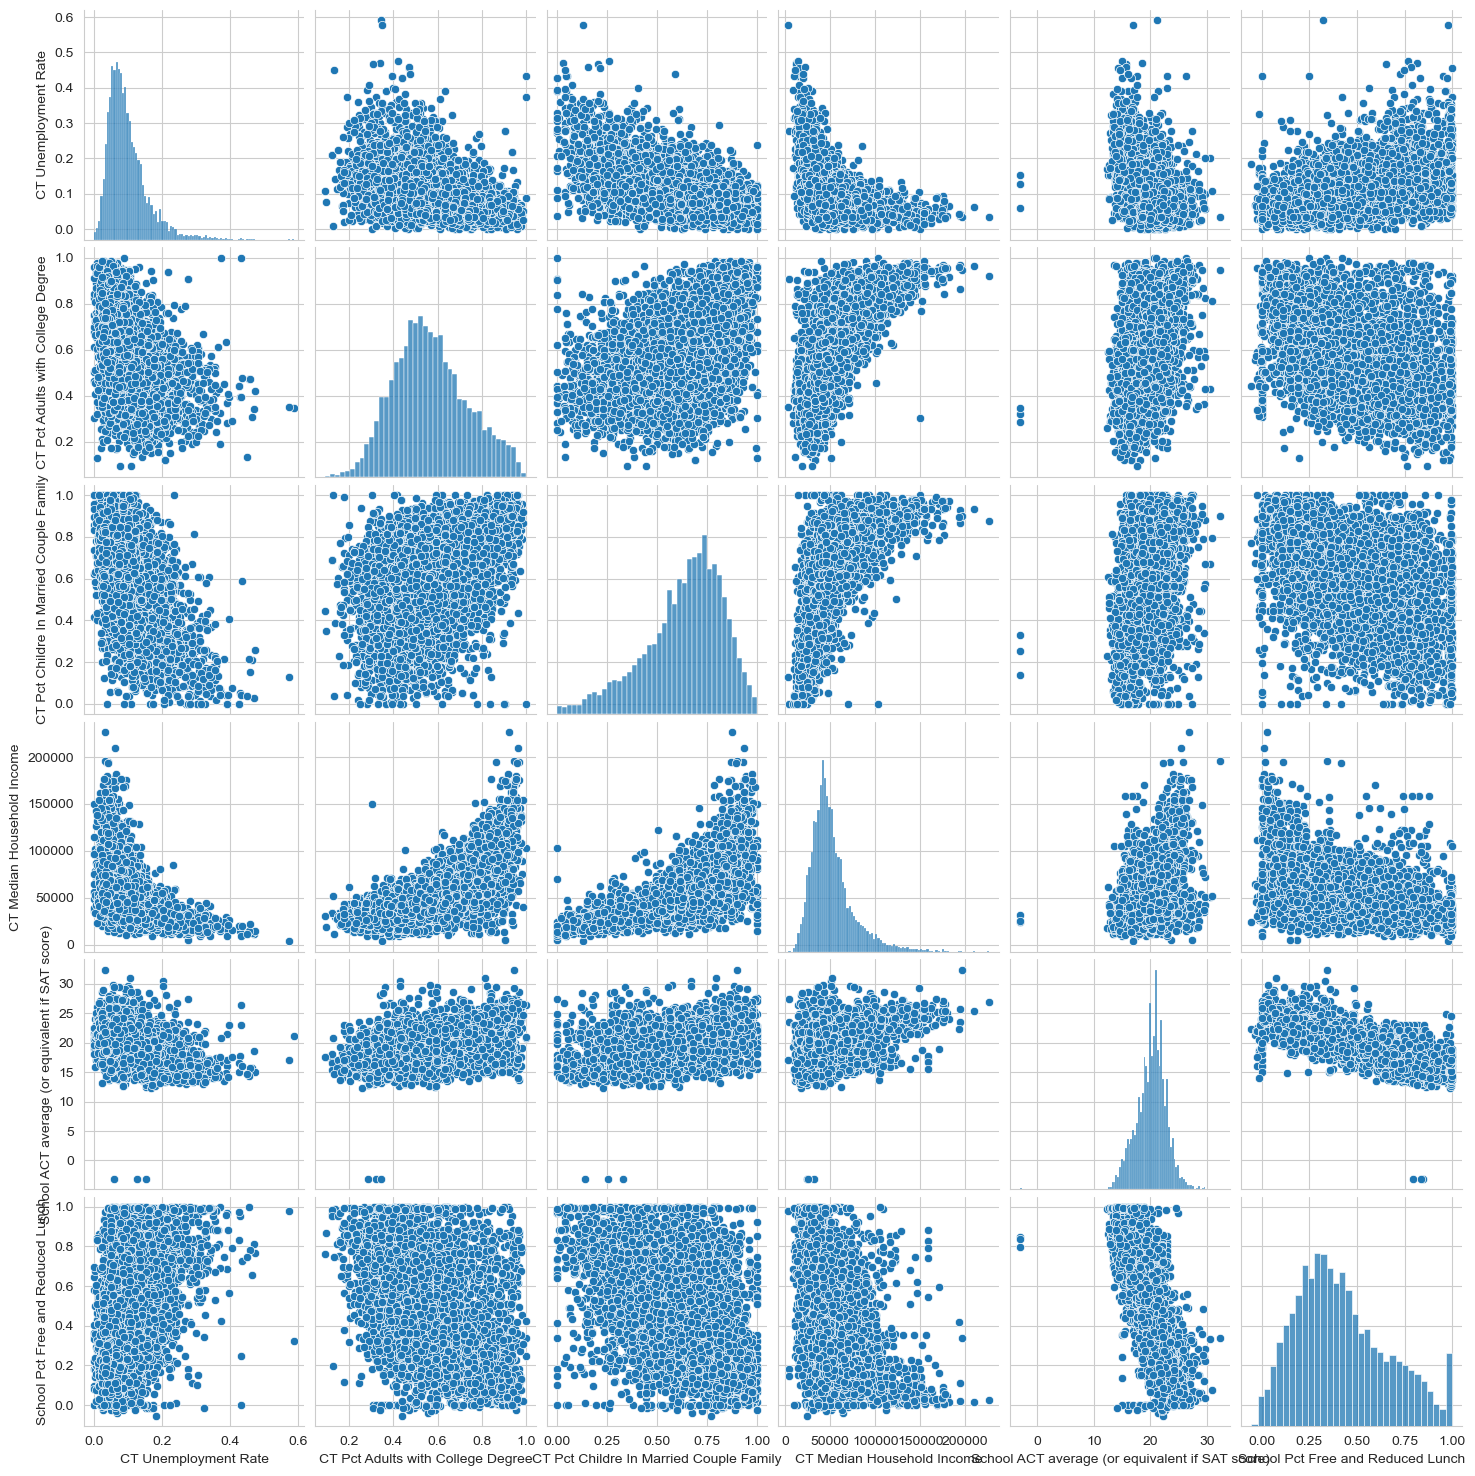

In [12]:
## begin with a pairplot
sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
    # drop this because it's just the ID, focus on the actual data
);
plt.show()

Is there a relationship between the socioeconomic variables and the ACT scores? some releationships emerge

This is also a good opportunity for quality control: note that there are negative values in the ACT scores (does not pass sanity check)

We can specify that we want regression lines draw on and specify features of them/plots themselves by adding in kind='reg' 

<function matplotlib.pyplot.show(close=None, block=None)>

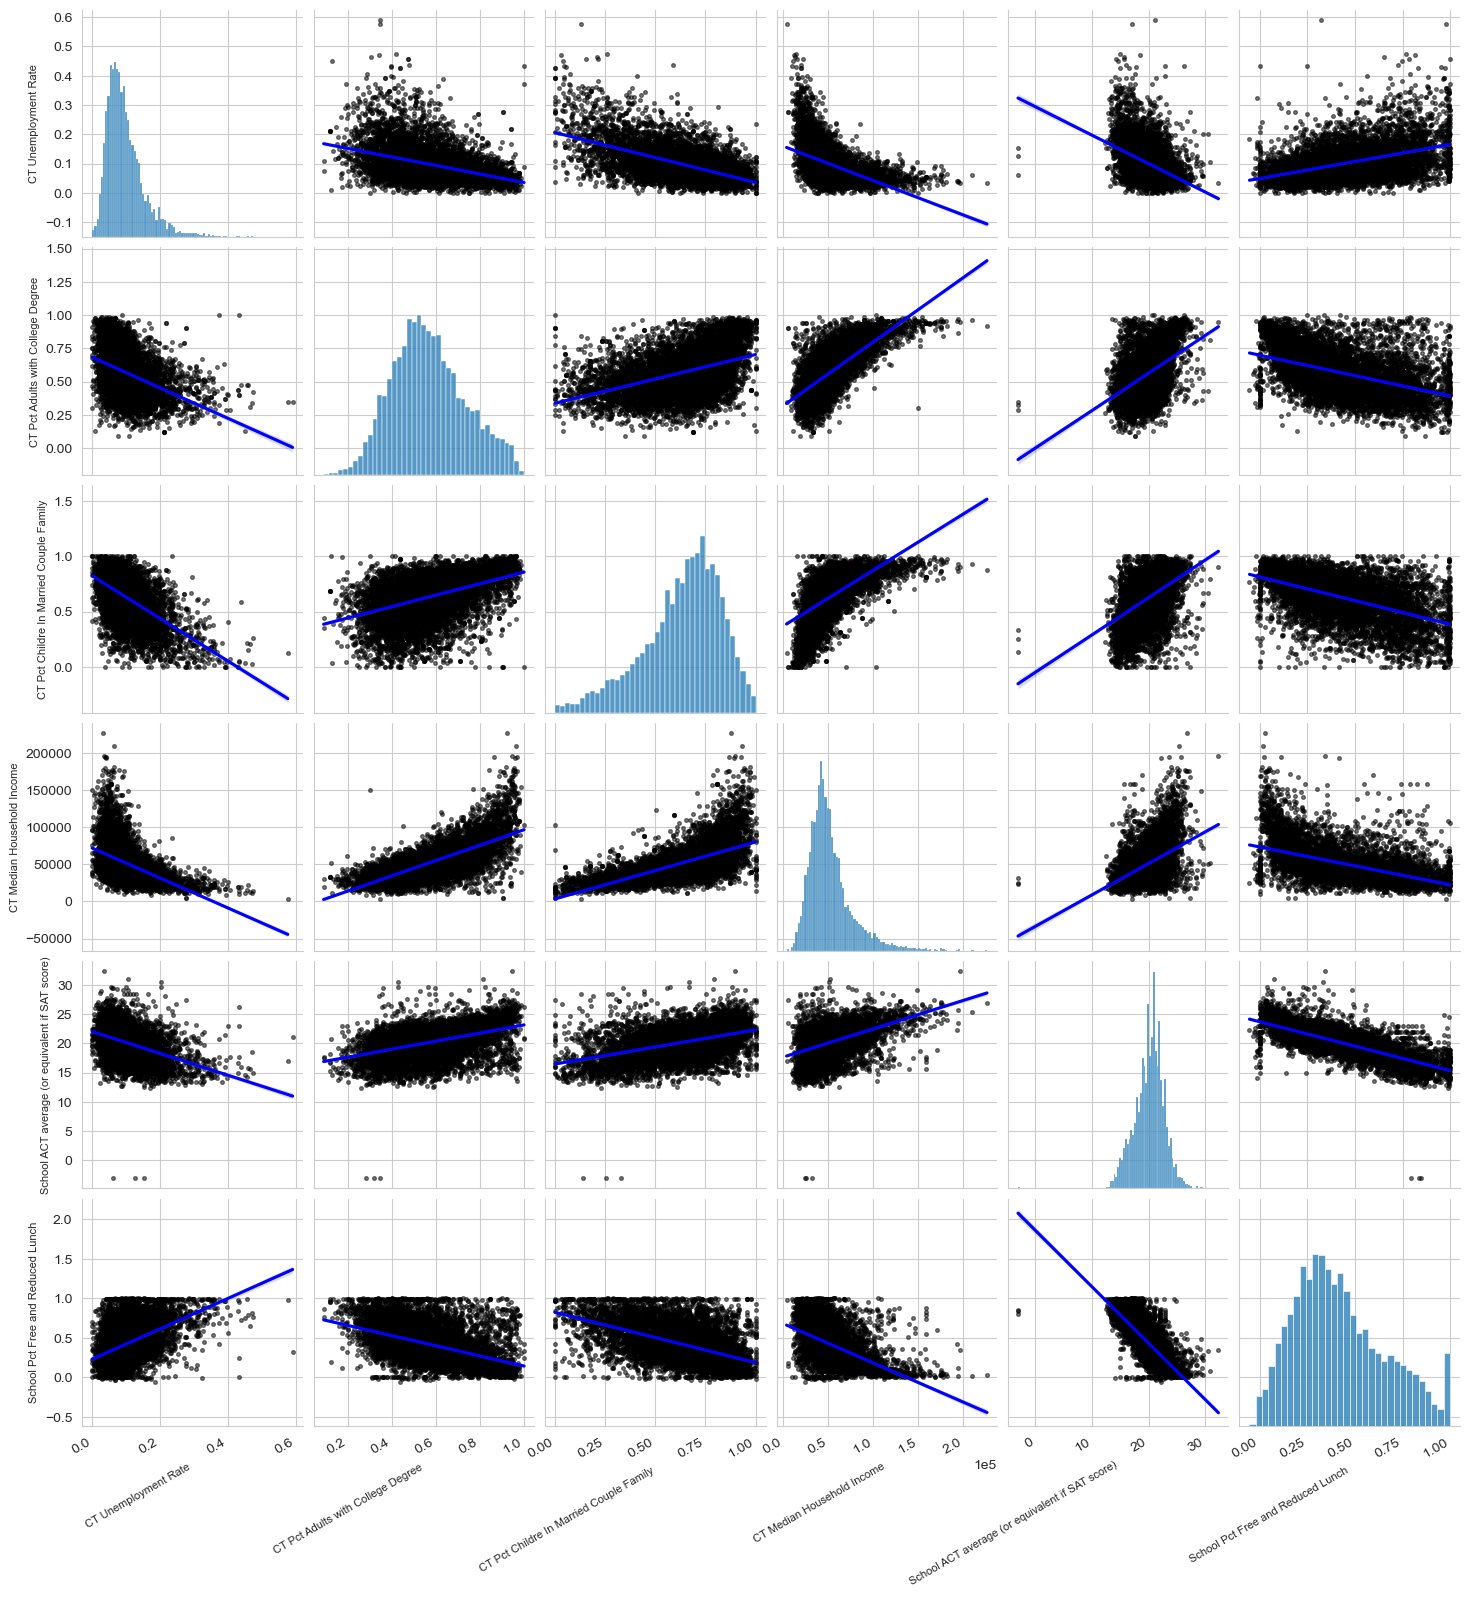

In [13]:
fig = sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
    ,kind='reg' ## regression 
    ,plot_kws={
        "line_kws":{'color':'blue'},
        "scatter_kws":{"alpha":0.5,"color":"k","s":7},
        },
)

for ax in fig.axes.flat:
    if ax.get_xlabel()=='CT Median Household Income':
        ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0)) ## apply sci notation
    ax.set_xlabel(ax.get_xlabel(),fontsize=8, rotation=30, ha='right') ## x axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(),fontsize=8) ## y axis label size
    
    ## rotate x axis tick labels
    plt.setp(ax.get_xticklabels(),rotation=30,ha='right')
plt.show
    
    

With a plot this large it is worth looking at individual relationships 

<function matplotlib.pyplot.show(close=None, block=None)>

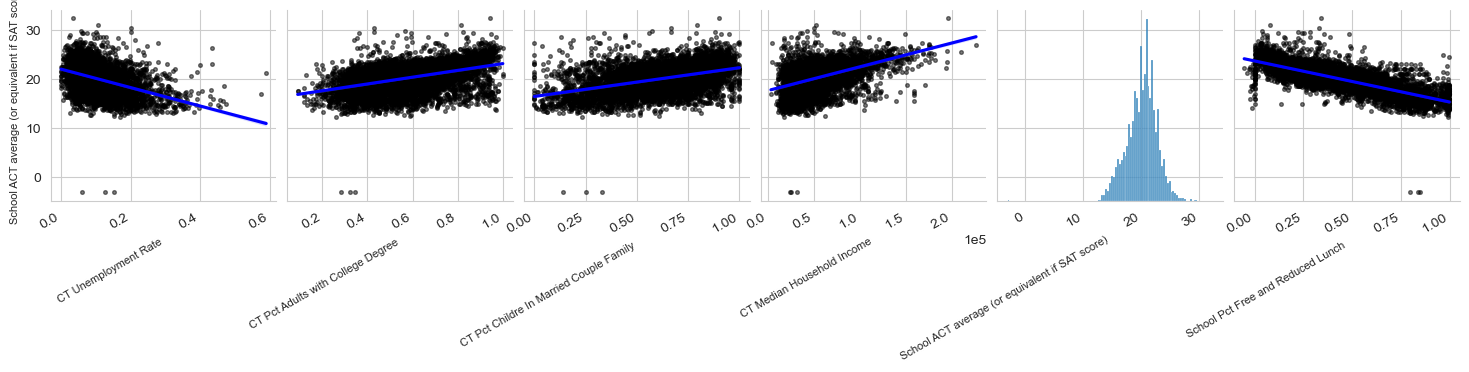

In [14]:
fig = sns.pairplot(
    edgap.drop(columns='NCESSCH School ID')
    ## now we'll see a single row
    ,y_vars=['School ACT average (or equivalent if SAT score)']
    ,kind='reg' ## regression 
    ,plot_kws={
        "line_kws":{'color':'blue'},
        "scatter_kws":{"alpha":0.5,"color":"k","s":7},
        },
)

for ax in fig.axes.flat:
    if ax.get_xlabel()=='CT Median Household Income':
        ax.ticklabel_format(style='sci',axis='x',scilimits=(0,0)) ## apply sci notation
    ax.set_xlabel(ax.get_xlabel(),fontsize=8, rotation=30, ha='right') ## x axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(),fontsize=8) ## y axis label size
    
    ## rotate x axis tick labels
    plt.setp(ax.get_xticklabels(),rotation=30,ha='right')
plt.show
    
    

* there does appear to be a relationship between the socioeconomic variables and act scores
* there are some out of range ACT scores and percent lunch values that we need to address
* we shoul dhave confidence that it is worthwhile to spend time prepping this data

# Data Preparation

## Select relevant subsets of the data
the school info has many columns, we only need year, school identity, location, and type

keep SCHOOL_YEAR, NCESSCH, LSTATE, LZIP, SCH_TYPE_TEXT, LEVEL, CHARTER_TEXT

In [15]:
school_info = school_info[['SCHOOL_YEAR', 'NCESSCH', 'LSTATE', 'LZIP', 'SCH_TYPE_TEXT', 'LEVEL', 'CHARTER_TEXT','SCH_NAME','LEAID','SCHID']
                         ]

school_info.head()

SCHOOL_YEAR       NCESSCH LSTATE   LZIP       SCH_TYPE_TEXT LEVEL  \
0   2016-2017  1.000020e+10     AL  35220  Alternative School  High   
1   2016-2017  1.000020e+10     AL  36067  Alternative School  High   
2   2016-2017  1.000020e+10     AL  36784  Alternative School  High   
3   2016-2017  1.000020e+10     AL  36057  Alternative School  High   
4   2016-2017  1.000020e+10     AL  35206  Alternative School  High   

  CHARTER_TEXT                          SCH_NAME   LEAID     SCHID  
0           No  Sequoyah Sch - Chalkville Campus  100002  100277.0  
1           No                             Camps  100002  101667.0  
2           No                           Det Ctr  100002  101670.0  
3           No     Wallace Sch - Mt Meigs Campus  100002  101705.0  
4           No         McNeel Sch - Vacca Campus  100002  101706.0

In [16]:
edgap = edgap.rename(
    columns={
        "NCESSCH School ID":'id'
        ,"CT Pct Adults with College Degree" : "percent_college"
        ,"CT Unemployment Rate" : 'rate_unemployment'
        ,"CT Pct Childre In Married Couple Family" : 'percent_married'
        ,"CT Median Household Income" : "median_income"
        ,"School ACT average (or equivalent if SAT score)" : "average_act"
        ,"School Pct Free and Reduced Lunch" : "percent_lunch"
    })

In [17]:
edgap.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch  
0        42820.0    20.433455       0.066901  
1        89320.0    19.498168       0.112412  
2        84140.0    19.554335       0.096816  
3        56500.0    17.737485       0.296960  
4        54015.0    18.245421       0.262641

In [18]:
school_info = school_info.rename(
    columns={
        "SCHOOL_YEAR" : 'year'
        ,"NCESSCH" : 'id'
        ,"LSTATE" : 'state'
        ,"LZIP" : 'zipcode'
        ,"SCH_TYPE_TEXT" : 'school_type'
        ,"LEVEL" : 'school_level'
        ,"CHARTER_TEXT" : "charter"
        ,'SCH_NAME':'sch_name'
        ,'LEAID':'leaid'
        ,'SCHID':'schid'
    })

In [19]:
school_info.head()

year            id state zipcode         school_type school_level  \
0  2016-2017  1.000020e+10    AL   35220  Alternative School         High   
1  2016-2017  1.000020e+10    AL   36067  Alternative School         High   
2  2016-2017  1.000020e+10    AL   36784  Alternative School         High   
3  2016-2017  1.000020e+10    AL   36057  Alternative School         High   
4  2016-2017  1.000020e+10    AL   35206  Alternative School         High   

  charter                          sch_name   leaid     schid  
0      No  Sequoyah Sch - Chalkville Campus  100002  100277.0  
1      No                             Camps  100002  101667.0  
2      No                           Det Ctr  100002  101670.0  
3      No     Wallace Sch - Mt Meigs Campus  100002  101705.0  
4      No         McNeel Sch - Vacca Campus  100002  101706.0

# Now that we've processed each dataframe we will join them
## We need to make sure the keys match first

In [20]:
school_info['id'] = school_info['id'].astype('object')
school_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102183 entries, 0 to 102182
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          102183 non-null  object 
 1   id            102181 non-null  object 
 2   state         102183 non-null  object 
 3   zipcode       102183 non-null  object 
 4   school_type   102181 non-null  object 
 5   school_level  102179 non-null  object 
 6   charter       102179 non-null  object 
 7   sch_name      102183 non-null  object 
 8   leaid         102183 non-null  object 
 9   schid         102181 non-null  float64
dtypes: float64(1), object(9)
memory usage: 7.8+ MB


Now we want to keep all the EdGap data, and bring in the school data where we have the data we care about, this will be a left join on the EdGap dataset

In [21]:
df = edgap.merge(
    school_info
    ,how='left'
    ,on='id')
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zipcode  \
0        42820.0    20.433455       0.066901  2016-2017    DE   19804   
1        89320.0    19.498168       0.112412  2016-2017    DE   19709   
2        84140.0    19.554335       0.096816  2016-2017    DE   19709   
3        56500.0    17.737485       0.296960  2016-2017    DE   19958   
4        54015.0    18.245421       0.262641  2016-2017    DE   19934   

      school_type school_level charter                   sch_name    leaid  \
0  Regular School         High     Yes  Delaware Military Academy  1000016   
1  Regular School         High      No     Middletown High School  1000080   
2  Regular School         High      No  Appoquinimink High School  1000080   
3  Regular School         High      No  Cape Henlopen High School  1000170   
4  Regular School         High      No  Caesar Rodney High School  1000180   

       schid  
0  1000143.0  
1  1000024.0  
2  1000225.0  
3  1000029.0  
4  1000040.0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7986 entries, 0 to 7985
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7986 non-null   object 
 1   rate_unemployment  7972 non-null   float64
 2   percent_college    7973 non-null   float64
 3   percent_married    7961 non-null   float64
 4   median_income      7966 non-null   float64
 5   average_act        7986 non-null   float64
 6   percent_lunch      7986 non-null   float64
 7   year               7898 non-null   object 
 8   state              7898 non-null   object 
 9   zipcode            7898 non-null   object 
 10  school_type        7898 non-null   object 
 11  school_level       7898 non-null   object 
 12  charter            7898 non-null   object 
 13  sch_name           7898 non-null   object 
 14  leaid              7898 non-null   object 
 15  schid              7898 non-null   float64
dtypes: float64(7), object(9)

# Quality Control
### Check the min and max values in each column, we know there are some natural bounds like percentages between 0-100, or ensuring positive values where negative is not possible

In [23]:
df.describe()

rate_unemployment  percent_college  percent_married  median_income  \
count        7972.000000      7973.000000      7961.000000    7966.000000   
mean            0.098730         0.568930         0.633440   52026.905222   
std             0.058959         0.165704         0.196764   24228.057079   
min             0.000000         0.091493         0.000000    3589.000000   
25%             0.058655         0.450828         0.523810   36597.250000   
50%             0.085649         0.554979         0.667594   46833.500000   
75%             0.123376         0.676571         0.777135   61369.250000   
max             0.590278         1.000000         1.000000  226181.000000   

       average_act  percent_lunch         schid  
count  7986.000000    7986.000000  7.898000e+03  
mean     20.181532       0.420651  3.316423e+06  
std       2.595201       0.239754  1.323264e+06  
min      -3.070818      -0.054545  1.000024e+06  
25%      18.600000       0.238501  2.101487e+06  
50%      20.400000       0.381570  3.604479e+06  
75%      21.910867       0.575447  4.207507e+06  
max      32.362637       0.998729  5.600448e+06

In [24]:
df.select_dtypes(include=['number']).agg(['min','max']).round(2)
## selecting only the numerical data

rate_unemployment  percent_college  percent_married  median_income  \
min               0.00             0.09              0.0         3589.0   
max               0.59             1.00              1.0       226181.0   

     average_act  percent_lunch      schid  
min        -3.07          -0.05  1000024.0  
max        32.36           1.00  5600448.0

There are some extreme values that are unlikely, and some that are impossible. The clearly incorrect values we'll set to NaN

In [25]:
df.loc[df['percent_lunch']<0,'percent_lunch']= np.nan
df.loc[df['average_act']<1,'average_act'] = np.nan

## Checking categorical data

In [26]:
df['school_type'].value_counts()

school_type
Regular School                 7885
Alternative School               10
Special Education School          2
Career and Technical School       1
Name: count, dtype: int64

In [27]:
df['school_level'].value_counts()

school_level
High            7230
Other            631
Not reported      35
Elementary         2
Name: count, dtype: int64

In [28]:
df['charter'].value_counts()

charter
No                7329
Yes                352
Not applicable     217
Name: count, dtype: int64

In [29]:
## keep only the high schools
df = df.loc[df['school_level']=='High']

In [30]:
## check for duplicated rows
df.duplicated().sum()

np.int64(0)

# Missing Values
start with determining how many are missing

In [31]:
df.isna().sum().to_frame(name='Number of Missing values')

Number of Missing values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               3
percent_lunch                            20
year                                      0
state                                     0
zipcode                                   0
school_type                               0
school_level                              0
charter                                   0
sch_name                                  0
leaid                                     0
schid                                     0

In [32]:
percent_missing = df.isna().mean().round(4) * 100
percent_missing.to_frame(name='Percent Missing Values')

Percent Missing Values
id                                   0.00
rate_unemployment                    0.17
percent_college                      0.15
percent_married                      0.28
median_income                        0.22
average_act                          0.04
percent_lunch                        0.28
year                                 0.00
state                                0.00
zipcode                              0.00
school_type                          0.00
school_level                         0.00
charter                              0.00
sch_name                             0.00
leaid                                0.00
schid                                0.00

In [33]:
df['state'].value_counts()

state
TX    913
OH    654
IL    564
PA    543
MI    498
NC    407
FL    404
GA    367
WI    351
NJ    341
MO    337
IN    321
NY    295
TN    265
WA    263
MA    253
KY    198
LA    194
WY     38
DE     24
Name: count, dtype: int64

In [34]:
df['state'].nunique()

20

Show on a map where we have values and what they are

In [35]:
#pip install plotly

In [36]:
import plotly.offline as po
import plotly.graph_objs as pg
po.init_notebook_mode(connected=True)

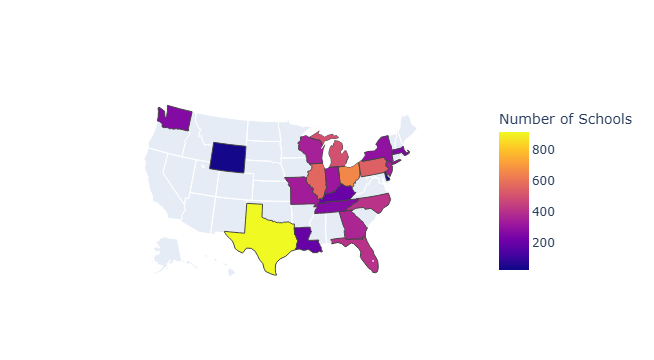

In [37]:
layout = dict(
    geo={"scope": "usa"},
    coloraxis_colorbar=dict(title="Number of Schools")
)

data = dict(
    type="choropleth",
    locations=df["state"].value_counts().index,
    locationmode="USA-states",
    z=df["state"].value_counts().values,
    coloraxis="coloraxis"
)

x = pg.Figure(data=[data], layout=layout)
po.iplot(x)

We are missing a lot of data simply from omission. We're going to drop the rows where the average ACT score is missing, since that is what we are interested in and we don't have many missing values

In [38]:
df=df.dropna(subset=['average_act'])

In [39]:
df.isna().sum().to_frame(name='Number of Missing Values')

Number of Missing Values
id                                        0
rate_unemployment                        12
percent_college                          11
percent_married                          20
median_income                            16
average_act                               0
percent_lunch                            20
year                                      0
state                                     0
zipcode                                   0
school_type                               0
school_level                              0
charter                                   0
sch_name                                  0
leaid                                     0
schid                                     0

If we were to drop rows that have NaNs for any socioeconomic variables, then we would negatively affect our analysis using the variables where the data was present. We will impute those rows based on relationships we see in the data

# Data Imputation

In [40]:
predictor_variables = [
    'rate_unemployment'
    ,'percent_college'
    ,'percent_married'
    ,'median_income'
    ,'percent_lunch'
    ,'state'
    ,'charter'
]

We will use an interative imputer, what we're doing is using a type of regression analysis to look at relationships between predictors so if we're missing one i can use the best guess of it based on it's relationship to the other variables

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [42]:
imputer = IterativeImputer()

In [43]:
numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

In [44]:
print(numerical_predictors)

['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch']


Fit the imputer with the data from those columns, here we are learning the relationships between thoes columns and then we can apply the transform method to actually replace the values

In [45]:
imputer.fit(df.loc[:, numerical_predictors])

IterativeImputer()

In [46]:
df.loc[:,numerical_predictors] = imputer.transform(df.loc[:,numerical_predictors])

In [47]:
df.isna().sum()

id                   0
rate_unemployment    0
percent_college      0
percent_married      0
median_income        0
average_act          0
percent_lunch        0
year                 0
state                0
zipcode              0
school_type          0
school_level         0
charter              0
sch_name             0
leaid                0
schid                0
dtype: int64

This confirms we have imputed all our missing values!

# Return to EDA of Extra Data

## Higher Ed Pre-Processing

In [48]:
higher_ed_locations.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7153 entries, 0 to 7152
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   UNITID    7153 non-null   int64  
 1   INSTNM    7153 non-null   object 
 2   IALIAS    7153 non-null   object 
 3   ADDR      7153 non-null   object 
 4   CITY      7153 non-null   object 
 5   STABBR    7153 non-null   object 
 6   ZIP       7153 non-null   object 
 7   FIPS      7153 non-null   int64  
 8   OBEREG    7153 non-null   int64  
 9   CHFNM     7153 non-null   object 
 10  CHFTITLE  7153 non-null   object 
 11  GENTELE   7153 non-null   object 
 12  EIN       7153 non-null   int64  
 13  DUNS      7153 non-null   object 
 14  OPEID     7153 non-null   object 
 15  OPEFLAG   7153 non-null   int64  
 16  WEBADDR   7153 non-null   object 
 17  ADMINURL  7153 non-null   object 
 18  FAIDURL   7153 non-null   object 
 19  APPLURL   7153 non-null   object 
 20  NPRICURL  7153 non-null   obje

In [49]:
## keep only relevant columns
higher_ed_locations = higher_ed_locations[['UNITID','INSTNM','ZIP','HLOFFER','INSTSIZE']]
## change column names
higher_ed_locations.columns = ['institute_id','institute_name','zipcode','max_credential','size']

In [50]:
## convert numerical codes into categories
max_credential_map = {
    0: 'Other',
    1: 'Certificate <1 year',
    2: 'Certificate 1-2 years',
    3: 'Associate’s degree',
    4: 'Certificate 2-4 years',
    5: 'Bachelor’s degree',
    6: 'Postbaccalaureate certificate',
    7: 'Master’s degree',
    8: 'Post-master’s certificate',
    9: 'Doctor’s degree',
    'b': 'None / No answer',
    -2: 'Not applicable (first-professional only)',
    -3: 'Not available'
}

size_map = {
    1: 'Under 1,000',
    2: '1,000–4,999',
    3: '5,000–9,999',
    4: '10,000–19,999',
    5: '20,000+',
    -1: 'Not reported',
    -2: 'Not applicable',
    -3: 'Not available'
}

higher_ed_locations['size_cat'] = higher_ed_locations['size'].map(size_map)

## remap the columns 
higher_ed_locations['max_cred_cat'] = higher_ed_locations['max_credential'].map(max_credential_map)

higher_ed_locations.head()

institute_id                       institute_name     zipcode  \
0        100654             Alabama A & M University       35762   
1        100663  University of Alabama at Birmingham  35294-0110   
2        100690                   Amridge University  36117-3553   
3        100706  University of Alabama in Huntsville       35899   
4        100724             Alabama State University  36104-0271   

   max_credential  size     size_cat     max_cred_cat  
0               9     3  5,000–9,999  Doctor’s degree  
1               9     5      20,000+  Doctor’s degree  
2               9     1  Under 1,000  Doctor’s degree  
3               9     3  5,000–9,999  Doctor’s degree  
4               9     2  1,000–4,999  Doctor’s degree

In [51]:
## Check if there are any codes missing
higher_ed_locations.loc[higher_ed_locations['size_cat'].isnull(), 'size'].unique()

array([], dtype=int64)

In [52]:
## Check if there are any codes missing
higher_ed_locations.loc[higher_ed_locations['max_cred_cat'].isnull(), 'max_credential'].unique()

array([], dtype=int64)

### Start higher level, by just doing a count of institutiions regardless of size or credentials offered 

In [53]:
## Count the number of institutions, by size and max_credential, for each zip code
higher_ed_zip = (higher_ed_locations.groupby(['zipcode'])['institute_id'].nunique()).reset_index()
higher_ed_zip.columns = ['zipcode','institution_count']
higher_ed_zip.head()

zipcode  institution_count
0       00602                  2
1  00602-0960                  1
2       00603                  4
3  00604-6150                  1
4       00605                  1

In [54]:
## drop any hyper specific zip code location type
higher_ed_zip['zipcode'] = higher_ed_zip['zipcode'].str[:5]
higher_ed_zip.head()

zipcode  institution_count
0   00602                  2
1   00602                  1
2   00603                  4
3   00604                  1
4   00605                  1

In [55]:
## reaggregate 
higher_ed_zip = (higher_ed_zip.groupby(['zipcode'])['institution_count'].nunique()).reset_index()
#higher_ed_zip.columns = ['zipcode','institution_count']
higher_ed_zip.head()

zipcode  institution_count
0   00602                  2
1   00603                  1
2   00604                  1
3   00605                  1
4   00612                  1

In [56]:
higher_ed_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681 entries, 0 to 4680
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   zipcode            4681 non-null   object
 1   institution_count  4681 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 73.3+ KB


## Referrals and Arrest Data 


CRDC “Referrals and Arrests” tracks disciplinary actions involving law enforcement. The fields you listed correspond to counts of students referred to law enforcement or subjected to school-related arrests, disaggregated by disability status, race/ethnicity, gender, and program type

CH_	School-level count (as opposed to district-level).

DISCWODIS	“Discipline Without Disabilities” — applies to students not served under IDEA (Individuals with Disabilities Education Act).

DISCWDIS	“Discipline With Disabilities” — applies to students served under IDEA or Section 504.

REF	Referred to law enforcement (but not necessarily arrested).

ARR	School-related arrest (formal arrest due to school discipline).

IDEA	Students with disabilities served under the Individuals with Disabilities Education Act (special education).

504	Students with disabilities served under Section 504 of the Rehabilitation Act (not IDEA, but still have accommodations).

LEP	Limited English Proficient students (English learners).

TR	Two or more races (“TR” = “Two or more races”).

WH	White students.

HI	Hispanic/Latino students.

M / F	Male / Female students.


In [57]:
pd.set_option('display.max_columns',None)
referrals_arrest.head()

LEA_STATE LEA_STATE_NAME   LEAID                LEA_NAME  SCHID  \
0        AL        ALABAMA  100002  Alabama Youth Services   1017   
1        AL        ALABAMA  100002  Alabama Youth Services   1017   
2        AL        ALABAMA  100002  Alabama Youth Services   1018   
3        AL        ALABAMA  100002  Alabama Youth Services   1999   
4        AL        ALABAMA  100005        Albertville City   1008   

                        SCH_NAME     COMBOKEY   JJ  SCH_DISCWODIS_REF_HI_M  \
0  Wallace Sch - Mt Meigs Campus  10000201705  Yes                      -9   
1      McNeel Sch - Vacca Campus  10000201706  Yes                      -9   
2         Alabama Youth Services  10000201876   No                       0   
3                 AUTAUGA CAMPUS  10000299995  Yes                      -9   
4      Albertville Middle School  10000500870   No                       0   

   SCH_DISCWODIS_REF_HI_F  SCH_DISCWODIS_REF_AM_M  SCH_DISCWODIS_REF_AM_F  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_AS_M  SCH_DISCWODIS_REF_AS_F  SCH_DISCWODIS_REF_HP_M  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_HP_F  SCH_DISCWODIS_REF_BL_M  SCH_DISCWODIS_REF_BL_F  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_WH_M  SCH_DISCWODIS_REF_WH_F  SCH_DISCWODIS_REF_TR_M  \
0                      -9                      -9                      -9   
1                      -9                      -9                      -9   
2                       0                       0                       0   
3                      -9                      -9                      -9   
4                       0                       0                       0   

   SCH_DISCWODIS_REF_TR_F  TOT_DISCWODIS_REF_M  TOT_DISCWODIS_REF_F  \
0                      -9                   -9                   -9   
1                      -9                   -9                   -9   
2                       0                    0                    0   
3                      -9                   -9                   -9   
4                       0                    0                    0   

   SCH_DISCWODIS_REF_LEP_M  SCH_DISCWODIS_REF_LEP_F  \
0                       -9                       -9   
1                       -9                       -9   
2                        0                        0   
3                       -9                       -9   
4                        0                        0   

   SCH_DISCWDIS_REF_IDEA_HI_M  SCH_DISCWDIS_REF_IDEA_HI_F  \
0                          -9                          -9   
1                          -9                          -9   
2                           0                           0   
3                          -9                          -9   
4                           0                           0   

   SCH_DISCWDIS_REF_IDEA_AM_M  SCH_DISCWDIS_REF_IDEA_AM_F  \
0                          -9                          -9   
1                  

In [58]:
referrals_arrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97632 entries, 0 to 97631
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LEA_STATE                   97632 non-null  object
 1   LEA_STATE_NAME              97632 non-null  object
 2   LEAID                       97632 non-null  object
 3   LEA_NAME                    97632 non-null  object
 4   SCHID                       97632 non-null  int64 
 5   SCH_NAME                    97632 non-null  object
 6   COMBOKEY                    97632 non-null  object
 7   JJ                          97632 non-null  object
 8   SCH_DISCWODIS_REF_HI_M      97632 non-null  int64 
 9   SCH_DISCWODIS_REF_HI_F      97632 non-null  int64 
 10  SCH_DISCWODIS_REF_AM_M      97632 non-null  int64 
 11  SCH_DISCWODIS_REF_AM_F      97632 non-null  int64 
 12  SCH_DISCWODIS_REF_AS_M      97632 non-null  int64 
 13  SCH_DISCWODIS_REF_AS_F      97632 non-null  in

In [59]:
## despite tons of googling, I can't find a good answer to why we have negative values
## i'm going to assume negative values are different types of non reported / missing etc and treat them as nulls
referrals_arrest['SCH_DISCWODIS_REF_HI_M'].unique()

array([ -9,   0,   1,   4,   2,   3,   6,   5,  10,   8,  14,  12,  11,
         7,   9,  13,  36,  -3,  22,  15,  26,  24,  27,  33,  37,  28,
        38,  32,  34,  50,  21,  18,  16,  31,  20,  25,  39,  17,  53,
        19,  47,  -5,  66,  23,  44,  29,  30,  90,  35,  81,  72,  45,
        80,  85,  77,  74,  65,  -6,  60,  56,  43,  94,  57,  41,  70,
        88,  62, 401, 161,  86,  84,  40, 156, 105, 102,  54])

In [60]:
## replace - values with nan
num_cols = referrals_arrest.select_dtypes(include=[np.number]).columns
referrals_arrest[num_cols] = referrals_arrest[num_cols].mask(referrals_arrest[num_cols]<0,np.nan)
referrals_arrest.head()

LEA_STATE LEA_STATE_NAME   LEAID                LEA_NAME  SCHID  \
0        AL        ALABAMA  100002  Alabama Youth Services   1017   
1        AL        ALABAMA  100002  Alabama Youth Services   1017   
2        AL        ALABAMA  100002  Alabama Youth Services   1018   
3        AL        ALABAMA  100002  Alabama Youth Services   1999   
4        AL        ALABAMA  100005        Albertville City   1008   

                        SCH_NAME     COMBOKEY   JJ  SCH_DISCWODIS_REF_HI_M  \
0  Wallace Sch - Mt Meigs Campus  10000201705  Yes                     NaN   
1      McNeel Sch - Vacca Campus  10000201706  Yes                     NaN   
2         Alabama Youth Services  10000201876   No                     0.0   
3                 AUTAUGA CAMPUS  10000299995  Yes                     NaN   
4      Albertville Middle School  10000500870   No                     0.0   

   SCH_DISCWODIS_REF_HI_F  SCH_DISCWODIS_REF_AM_M  SCH_DISCWODIS_REF_AM_F  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_AS_M  SCH_DISCWODIS_REF_AS_F  SCH_DISCWODIS_REF_HP_M  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_HP_F  SCH_DISCWODIS_REF_BL_M  SCH_DISCWODIS_REF_BL_F  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_WH_M  SCH_DISCWODIS_REF_WH_F  SCH_DISCWODIS_REF_TR_M  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_TR_F  TOT_DISCWODIS_REF_M  TOT_DISCWODIS_REF_F  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     0.0                  0.0                  0.0   
3                     NaN                  NaN                  NaN   
4                     0.0                  0.0                  0.0   

   SCH_DISCWODIS_REF_LEP_M  SCH_DISCWODIS_REF_LEP_F  \
0                      NaN                      NaN   
1                      NaN                      NaN   
2                      0.0                      0.0   
3                      NaN                      NaN   
4                      0.0                      0.0   

   SCH_DISCWDIS_REF_IDEA_HI_M  SCH_DISCWDIS_REF_IDEA_HI_F  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         0.0                         0.0   
3                         NaN                         NaN   
4                         0.0                         0.0   

   SCH_DISCWDIS_REF_IDEA_AM_M  SCH_DISCWDIS_REF_IDEA_AM_F  \
0                         NaN                         NaN   
1                  

In [61]:
## iterate through all the columns, and determine whether they're referrals (REF) or arrests (ARR)
arr_cols = [col for col in referrals_arrest.columns if '_ARR' in col]
ref_cols = [col for col in referrals_arrest.columns if '_REF' in col]

referrals_arrest['arrests'] = referrals_arrest[arr_cols].sum(axis=1, skipna=True)
referrals_arrest['referrals'] = referrals_arrest[ref_cols].sum(axis=1, skipna=True)

referrals_arrest.head()

LEA_STATE LEA_STATE_NAME   LEAID                LEA_NAME  SCHID  \
0        AL        ALABAMA  100002  Alabama Youth Services   1017   
1        AL        ALABAMA  100002  Alabama Youth Services   1017   
2        AL        ALABAMA  100002  Alabama Youth Services   1018   
3        AL        ALABAMA  100002  Alabama Youth Services   1999   
4        AL        ALABAMA  100005        Albertville City   1008   

                        SCH_NAME     COMBOKEY   JJ  SCH_DISCWODIS_REF_HI_M  \
0  Wallace Sch - Mt Meigs Campus  10000201705  Yes                     NaN   
1      McNeel Sch - Vacca Campus  10000201706  Yes                     NaN   
2         Alabama Youth Services  10000201876   No                     0.0   
3                 AUTAUGA CAMPUS  10000299995  Yes                     NaN   
4      Albertville Middle School  10000500870   No                     0.0   

   SCH_DISCWODIS_REF_HI_F  SCH_DISCWODIS_REF_AM_M  SCH_DISCWODIS_REF_AM_F  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_AS_M  SCH_DISCWODIS_REF_AS_F  SCH_DISCWODIS_REF_HP_M  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_HP_F  SCH_DISCWODIS_REF_BL_M  SCH_DISCWODIS_REF_BL_F  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_WH_M  SCH_DISCWODIS_REF_WH_F  SCH_DISCWODIS_REF_TR_M  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   
2                     0.0                     0.0                     0.0   
3                     NaN                     NaN                     NaN   
4                     0.0                     0.0                     0.0   

   SCH_DISCWODIS_REF_TR_F  TOT_DISCWODIS_REF_M  TOT_DISCWODIS_REF_F  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     0.0                  0.0                  0.0   
3                     NaN                  NaN                  NaN   
4                     0.0                  0.0                  0.0   

   SCH_DISCWODIS_REF_LEP_M  SCH_DISCWODIS_REF_LEP_F  \
0                      NaN                      NaN   
1                      NaN                      NaN   
2                      0.0                      0.0   
3                      NaN                      NaN   
4                      0.0                      0.0   

   SCH_DISCWDIS_REF_IDEA_HI_M  SCH_DISCWDIS_REF_IDEA_HI_F  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         0.0                         0.0   
3                         NaN                         NaN   
4                         0.0                         0.0   

   SCH_DISCWDIS_REF_IDEA_AM_M  SCH_DISCWDIS_REF_IDEA_AM_F  \
0                         NaN                         NaN   
1                  

In [62]:
## sanity check -- checks out
referrals_arrest.loc[referrals_arrest['arrests']>1]

LEA_STATE LEA_STATE_NAME    LEAID  \
57           AL        ALABAMA   100012   
58           AL        ALABAMA   100012   
64           AL        ALABAMA   100013   
71           AL        ALABAMA   100022   
73           AL        ALABAMA   100024   
...         ...            ...      ...   
96207        WY        WYOMING  5601460   
96210        WY        WYOMING  5601470   
96448        WY        WYOMING  5605220   
96456        WY        WYOMING  5605302   
96516        WY        WYOMING  5606090   

                                                LEA_NAME  SCHID  \
57                                             Boaz City   1001   
58                                             Boaz City   1008   
64                                       Trussville City   1016   
71                                  Sequel TSI Courtland   1018   
73     Sequel TSI- New Beginnings School/ Owens Cross...   1018   
...                                                  ...    ...   
96207                 Big Horn County School District #2  56000   
96210                 Campbell County School District #1  56000   
96448                 Fremont County School District #25  56002   
96456               Sweetwater County School District #1  56002   
96516                   Weston County School District #7  56003   

                           SCH_NAME        COMBOKEY  JJ  \
57               Boaz Middle School     10001200123  No   
58                 Boaz High School     10001200874  No   
64     HewittTrussville High School     10001301682  No   
71      Three Springs Courtland Sch     10002201833  No   
73     Three Springs New Beginnings     10002401835  No   
...                             ...             ...  ..   
96207          Lovell Middle School  560146000000.0  No   
96210   Campbell County High School  560147000000.0  No   
96448          Riverton High School  560522000000.0  No   
96456      Rock Springs High School  560530000000.0  No   
96516           Upton Middle School  560609000000.0  No   

       SCH_DISCWODIS_REF_HI_M  SCH_DISCWODIS_REF_HI_F  SCH_DISCWODIS_REF_AM_M  \
57                        0.0                     0.0                     0.0   
58                        0.0                     0.0                     2.0   
64                        0.0                     0.0                     0.0   
71                        0.0                     0.0                     0.0   
73                        0.0                     0.0                     0.0   
...                       ...                     ...                     ...   
96207                     1.0                     0.0                     0.0   
96210                     2.0                     0.0                     0.0   
96448                     4.0                     1.0                     9.0   
96456                    12.0                     2.0                     0.0   
96516                     0.0                     0.0                     0.0   

       SCH_DISCWODIS_REF_AM_F  SCH_DISCWODIS_REF_AS_M  SCH_DISCWODIS_REF_AS_F  \
57                        0.0                     0.0                     0.0   
58                        0.0                     0.0                     0.0   
64                        0.0                     1.0                     0.0   
71                        0.0                     0.0                     0.0   
73                        0.0                     0.0                     0.0   
...                       ...                     ...                     ...   
96207                     0.0                     0.0                     0.0   
96210                     1.0                     0.0                     0.0   
96448                    10.0                     0.0                     0.0   
96456                     0.0                     0.0                     0.0   
96516                     0.0                     0.0                     0.0   

       SCH_DISCWODIS_REF_HP_M

In [63]:
## drop the other columns
#referrals_arrest.columns
referrals_arrest = referrals_arrest[['LEA_STATE','LEAID','SCHID','COMBOKEY','JJ','SCH_NAME','arrests','referrals']]

In [64]:
# lower case
referrals_arrest.columns = referrals_arrest.columns.str.lower()
referrals_arrest.head()

lea_state   leaid  schid     combokey   jj                       sch_name  \
0        AL  100002   1017  10000201705  Yes  Wallace Sch - Mt Meigs Campus   
1        AL  100002   1017  10000201706  Yes      McNeel Sch - Vacca Campus   
2        AL  100002   1018  10000201876   No         Alabama Youth Services   
3        AL  100002   1999  10000299995  Yes                 AUTAUGA CAMPUS   
4        AL  100005   1008  10000500870   No      Albertville Middle School   

   arrests  referrals  
0      0.0        0.0  
1      0.0        0.0  
2      0.0        0.0  
3      0.0        0.0  
4      0.0        0.0

#### COMBOKEY lost precision in excel, was not able to use it in a join. Have to clean the school names and rely on a fuzzy match between school name and LEAID (too many schools with the same name to do name alone) This helped confirm matches to spot check with: https://www.air.org/project/research-evaluation-support-civil-rights-data-collection-crdc

Going to have some error as I can't match every school


In [65]:
combokeys=list(referrals_arrest['combokey'].unique())
ids=list(df['id'].unique())

unmatched_keys = [key for key in ids if key not in combokeys]

print(f"{len(unmatched_keys)} keys are missing out of {len(ids)} from the df i want to left join on")


7227 keys are missing out of 7227 from the df i want to left join on


In [66]:
referrals_arrest['id'] = referrals_arrest['leaid'].astype('str')+referrals_arrest['schid'].astype('str')

leaid_schid =list(referrals_arrest['id'].unique())

unmatched_keys = [key for key in ids if key not in leaid_schid]

print(f"{len(unmatched_keys)} keys are missing out of {len(ids)} from the df i want to left join on")


7227 keys are missing out of 7227 from the df i want to left join on


In [67]:
## ID didn't work so drop it
referrals_arrest = referrals_arrest.drop('id', axis=1)

In [68]:
# Convert to consistent string format (removes .0, spaces, etc.)
df['leaid'] = df['leaid'].astype(str).str.strip().str.replace(r'\.0$', '', regex=True)
referrals_arrest['leaid'] = referrals_arrest['leaid'].astype(str).str.strip()

# Standardize school name case/spacing
df['sch_name'] = df['sch_name'].str.strip().str.upper()
referrals_arrest['sch_name'] = referrals_arrest['sch_name'].str.strip().str.upper()


In [69]:
R_keys = set(zip(referrals_arrest['leaid'], referrals_arrest['sch_name']))
L_keys = set(zip(df['leaid'], df['sch_name']))

unmatched_schools = [(lea,name) for (lea, name) in L_keys if (lea, name) not in R_keys]

print(f"{len(unmatched_schools)} schools are missing out of {len(L_keys)} based on LEAID + sch_name")


520 schools are missing out of 7227 based on LEAID + sch_name


In [70]:
unmatched_schools

[('2600170', 'DETROIT COMMUNITY SCHOOLS - HIGH SCHOOL'),
 ('3600087', 'KINGSBRIDGE INTERNATIONAL HIGH SCHOOL'),
 ('3600099', 'QUEENS HIGH SCHOOL OF TEACHING LIBERAL ARTS AND SCIENCES'),
 ('4700148', 'CENTRAL HIGH SCHOOL'),
 ('3600095', 'HS FOR PUBLIC SERVICE-HEROES OF TOMORROW'),
 ('3600103', 'PORT RICHMOND HIGH SCHOOL'),
 ('3600083', 'A PHILIP RANDOLPH CAMPUS HIGH SCHOOL'),
 ('4212330', 'JEANNETTE SHS'),
 ('3600087', 'DISCOVERY HIGH SCHOOL'),
 ('2201170', 'BENJAMIN FRANKLIN HIGH SCHOOL'),
 ('2612560', 'EAST JORDAN MIDDLE/HIGH SCHOOL'),
 ('3600119', 'WILLIAMSBURG HIGH SCHOOL FOR ARCHITECTURE AND DESIGN'),
 ('3600087', 'BRONX HIGH SCHOOL OF SCIENCE'),
 ('2600210', 'CONNER CREEK ACADEMY EAST - MI COLLEGIATE HIGH'),
 ('4700690', 'CLEVELAND HIGH SCHOOL'),
 ('2501920', 'AMHERST REGIONAL HIGH'),
 ('3600083', 'COLLEGE ACADEMY (THE)'),
 ('2627690', 'PECK JR./SR. HIGH SCHOOL'),
 ('2600317', 'MADISON ACADEMY - HIGH SCHOOL'),
 ('2601001', 'FORD HIGH SCHOOL'),
 ('2612450', 'EAST DETROIT HIGH SCHOO

In [71]:
referrals_arrest.loc[referrals_arrest['leaid']=='5509600']

lea_state    leaid  schid        combokey  jj  \
95090        WI  5509600  55006  550960000000.0  No   
95091        WI  5509600  55006  550960000000.0  No   
95092        WI  5509600  55007  550960000000.0  No   
95093        WI  5509600  55008  550960000000.0  No   
95094        WI  5509600  55008  550960000000.0  No   
...         ...      ...    ...             ...  ..   
95245        WI  5509600  55030  550960000000.0  No   
95246        WI  5509600  55030  550960000000.0  No   
95247        WI  5509600  55030  550960000000.0  No   
95248        WI  5509600  55033  550960000000.0  No   
95249        WI  5509600  55033  550960000000.0  No   

                                              sch_name  arrests  referrals  
95090                           HAYES BILINGUAL SCHOOL      0.0        0.0  
95091      WISCONSIN CONSERVATORY OF LIFELONG LEARNING      8.0       14.0  
95092                                      ASSATA HIGH      2.0        2.0  
95093  NOVA-NORTHWEST OPPORTUNITIES VOCATIONAL ACADEMY     12.0       32.0  
95094                                      SHALOM HIGH      0.0        0.0  
...                                                ...      ...        ...  
95245                            ANDREW DOUGLAS SCHOOL      2.0        4.0  
95246                        SOUTH ACCELERATED ACADEMY      0.0        0.0  
95247                              LEE LEARNING CENTER      0.0        0.0  
95248                  REAGAN COLLEGE PREPARATORY HIGH     22.0       45.0  
95249       ALBA - ACADEMIA DE LENGUAJE Y BELLAS ARTES      0.0        0.0  

[160 rows x 8 columns]

In [72]:
df.loc[df['leaid']=='5509600']

id  rate_unemployment  percent_college  percent_married  \
7762  550960000670           0.024459         0.532359         0.812500   
7764  550960001127           0.050000         0.825510         0.832700   
7765  550960001180           0.090000         0.531335         0.672182   
7766  550960001199           0.251609         0.522380         0.152842   
7767  550960001218           0.078692         0.622748         0.315287   
7769  550960001235           0.087324         0.485180         0.729885   
7770  550960001237           0.085319         0.890496         0.947712   
7771  550960001247           0.197997         0.230720         0.497496   
7773  550960002272           0.140446         0.714723         0.486896   
7774  550960002339           0.105210         0.597101         0.181102   
7775  550960002603           0.333333         0.502825         0.351852   
7776  550960002608           0.123188         0.548998         0.341074   
7777  550960002700           0.243590         0.380488         0.335938   
7778  550960002730           0.205941         0.287591         0.018987   
7779  550960002755           0.115442         0.237100         0.639362   
7780  550960002782           0.048026         0.596376         0.551724   
7781  550960002822           0.016964         0.859462         0.784615   
7784  550960003342           0.101277         0.674860         0.887287   
7785  550960003370           0.172790         0.479514         0.409926   

      median_income  average_act  percent_lunch       year state zipcode  \
7762        50179.0         13.2       0.796407  2016-2017    WI   53233   
7764        70370.0         15.4       0.879824  2016-2017    WI   53207   
7765        45044.0         15.6       0.745098  2016-2017    WI   53220   
7766        30411.0         19.8       0.460916  2016-2017    WI   53209   
7767        25227.0         14.6       0.855641  2016-2017    WI   53204   
7769        31817.0         14.1       0.843704  2016-2017    WI   53215   
7770        24655.0         16.5       0.664371  2016-2017    WI   53211   
7771        22708.0         14.4       0.862664  2016-2017    WI   53204   
7773        59423.0         14.7       0.814253  2016-2017    WI   53224   
7774        17361.0         17.2       0.626582  2016-2017    WI   53233   
7775        13325.0         16.6       0.725714  2016-2017    WI   53205   
7776        33684.0         14.1       0.859564  2016-2017    WI   53210   
7777        40016.0         14.4       0.840708  2016-2017    WI   53218   
7778        28295.0         14.0       0.884393  2016-2017    WI   53206   
7779        34925.0         19.2       0.830247  2016-2017    WI   53215   
7780        42212.0         16.9       0.647761  2016-2017    WI   53215   
7781        79643.0         16.3       0.686567  2016-2017    WI   53204   
7784        57893.0         19.6       0.565961  2016-2017    WI   53221   
7785        33893.0         12.8       0.814050  2016-2017    WI   53223   

         school_type school_level charter  \
7762  Regular School         High      No   
7764  Regular School         High      No   
7765  Regular School         High      No   
7766  Regular School         High      No   
7767  Regular School         High      No   
7769  Regular School         High      No   
7770  Regular School         High      No   
7771  Regular School         High      No   
7773  Regular School         High      No   
7774  Regular School         High      No   
7775  Regular School         High     Yes   
7776  Regular School         High      No   
7777  Regular School         High      No   
7778  Regular School         High      No   
7779  Regular School         High     Yes   
7780  Regular School         High      No   
7781  Regular School         High     Yes   
7784  Regular School         High      No   
7785  Regular School         High      No   

                                               sch_name    leaid      schid  
7762           

In [73]:
df_join_ref_arr = df.merge(
    referrals_arrest,
    how='left',
    on=['leaid', 'sch_name']
)


In [74]:
## the ids from the crdc data were junk, drop them
df_join_ref_arr = df_join_ref_arr.drop(['schid_y','lea_state'], axis=1)

In [75]:
df_join_ref_arr.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zipcode  \
0        42820.0    20.433455       0.066901  2016-2017    DE   19804   
1        89320.0    19.498168       0.112412  2016-2017    DE   19709   
2        84140.0    19.554335       0.096816  2016-2017    DE   19709   
3        56500.0    17.737485       0.296960  2016-2017    DE   19958   
4        54015.0    18.245421       0.262641  2016-2017    DE   19934   

      school_type school_level charter                   sch_name    leaid  \
0  Regular School         High     Yes  DELAWARE MILITARY ACADEMY  1000016   
1  Regular School         High      No     MIDDLETOWN HIGH SCHOOL  1000080   
2  Regular School         High      No  APPOQUINIMINK HIGH SCHOOL  1000080   
3  Regular School         High      No  CAPE HENLOPEN HIGH SCHOOL  1000170   
4  Regular School         High      No  CAESAR RODNEY HIGH SCHOOL  1000180   

     schid_x        combokey  jj  arrests  referrals  
0  1000143.0  100002000000.0  No      0.0        2.0  
1  1000024.0  100008000000.0  No      4.0       46.0  
2  1000225.0  100008000000.0  No      0.0       24.0  
3  1000029.0  100017000000.0  No      0.0        0.0  
4  1000040.0  100018000000.0  No      8.0       56.0

In [76]:
df['zipcode'] = (
    df['zipcode']
    .astype(str)      # convert to string
    .str.strip()      # remove spaces
    .str.zfill(5)     # pad leading zeros
)

higher_ed_zip['zipcode'] = (
    higher_ed_zip['zipcode']
    .astype(str)
    .str.strip()
    .str.zfill(5)
)


missing_zips = set(df['zipcode']) - set(higher_ed_zip['zipcode'])
print(f"{len(missing_zips)} ZIP codes from df have no match in higher_ed_zip.")



4515 ZIP codes from df have no match in higher_ed_zip.


In [77]:
missing_zips

{'46157',
 '98332',
 '54767',
 '78654',
 '46158',
 '44138',
 '01886',
 '38544',
 '60107',
 '44811',
 '19120',
 '53215',
 '37327',
 '75489',
 '60561',
 '42001',
 '54729',
 '82833',
 '43205',
 '02494',
 '54170',
 '65556',
 '60636',
 '54891',
 '78009',
 '32824',
 '71403',
 '77904',
 '42129',
 '07945',
 '47802',
 '46552',
 '17552',
 '54124',
 '17821',
 '78872',
 '32404',
 '18055',
 '46619',
 '07621',
 '65631',
 '43517',
 '49004',
 '61277',
 '48240',
 '19143',
 '44254',
 '17752',
 '61523',
 '37762',
 '27501',
 '47885',
 '70748',
 '01085',
 '78374',
 '27944',
 '39842',
 '63133',
 '27317',
 '48134',
 '75941',
 '77632',
 '07036',
 '33128',
 '31909',
 '78624',
 '16950',
 '27525',
 '78592',
 '27412',
 '75230',
 '62631',
 '62449',
 '48101',
 '79562',
 '64844',
 '65714',
 '75088',
 '47586',
 '30147',
 '44444',
 '78574',
 '98840',
 '78154',
 '47909',
 '61607',
 '11221',
 '75142',
 '99323',
 '08226',
 '77351',
 '53916',
 '37658',
 '49646',
 '37058',
 '27316',
 '15656',
 '46975',
 '75189',
 '98607',


In [78]:
df_join = df_join_ref_arr.merge(
    higher_ed_zip,
    how='left',
    on='zipcode'
)

In [79]:
df_join['institution_count'] = df_join['institution_count'].fillna(0)
df_join.rename(columns={'schid_x': 'schid'}, inplace=True)

In [80]:
df_join.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zipcode  \
0        42820.0    20.433455       0.066901  2016-2017    DE   19804   
1        89320.0    19.498168       0.112412  2016-2017    DE   19709   
2        84140.0    19.554335       0.096816  2016-2017    DE   19709   
3        56500.0    17.737485       0.296960  2016-2017    DE   19958   
4        54015.0    18.245421       0.262641  2016-2017    DE   19934   

      school_type school_level charter                   sch_name    leaid  \
0  Regular School         High     Yes  DELAWARE MILITARY ACADEMY  1000016   
1  Regular School         High      No     MIDDLETOWN HIGH SCHOOL  1000080   
2  Regular School         High      No  APPOQUINIMINK HIGH SCHOOL  1000080   
3  Regular School         High      No  CAPE HENLOPEN HIGH SCHOOL  1000170   
4  Regular School         High      No  CAESAR RODNEY HIGH SCHOOL  1000180   

       schid        combokey  jj  arrests  referrals  institution_count  
0  1000143.0  100002000000.0  No      0.0        2.0                0.0  
1  1000024.0  100008000000.0  No      4.0       46.0                0.0  
2  1000225.0  100008000000.0  No      0.0       24.0                0.0  
3  1000029.0  100017000000.0  No      0.0        0.0                0.0  
4  1000040.0  100018000000.0  No      8.0       56.0                0.0

### create a dataframe for states that require the ACT or not based on data you found online
https://www.piqosity.com/act-sat-graduation-requirements-by-state/

In [81]:
## Had ChatGPT help me turn the list from article into a dataframe to save me a bunch of manual work

# Lists of states by testing type
provided_states = ["AK", "AR", "AZ", "FL", "GA", "MD", "MN", "MS", "NY", "OR", "PA", "VA", "SC", "TX", "WA"]
mandatory_states = ["CO", "CT", "DE", "DC", "ID", "IN", "KY", "MI", "NH", "NM", "RI", "WV"]

# List of all US state codes
all_states = [
    "AL","AK","AZ","AR","CA","CO","CT","DE","FL","GA","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD",
    "MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","RI","SC",
    "SD","TN","TX","UT","VT","VA","WA","WV","WI","WY","DC"
]

# Assign testing status
state_testing_data = {
    "state": all_states,
    "testing": [
        "Provided" if state in provided_states else
        "Mandatory" if state in mandatory_states else
        "Optional"
        for state in all_states
    ]
}

# Create DataFrame
state_testing = pd.DataFrame(state_testing_data)

state_testing.head()


state   testing
0    AL  Optional
1    AK  Provided
2    AZ  Provided
3    AR  Provided
4    CA  Optional

In [82]:
df_join = df_join.merge(
    state_testing,
    how='left',
    on='state'
)

In [83]:
df_join.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zipcode  \
0        42820.0    20.433455       0.066901  2016-2017    DE   19804   
1        89320.0    19.498168       0.112412  2016-2017    DE   19709   
2        84140.0    19.554335       0.096816  2016-2017    DE   19709   
3        56500.0    17.737485       0.296960  2016-2017    DE   19958   
4        54015.0    18.245421       0.262641  2016-2017    DE   19934   

      school_type school_level charter                   sch_name    leaid  \
0  Regular School         High     Yes  DELAWARE MILITARY ACADEMY  1000016   
1  Regular School         High      No     MIDDLETOWN HIGH SCHOOL  1000080   
2  Regular School         High      No  APPOQUINIMINK HIGH SCHOOL  1000080   
3  Regular School         High      No  CAPE HENLOPEN HIGH SCHOOL  1000170   
4  Regular School         High      No  CAESAR RODNEY HIGH SCHOOL  1000180   

       schid        combokey  jj  arrests  referrals  institution_count  \
0  1000143.0  100002000000.0  No      0.0        2.0                0.0   
1  1000024.0  100008000000.0  No      4.0       46.0                0.0   
2  1000225.0  100008000000.0  No      0.0       24.0                0.0   
3  1000029.0  100017000000.0  No      0.0        0.0                0.0   
4  1000040.0  100018000000.0  No      8.0       56.0                0.0   

     testing  
0  Mandatory  
1  Mandatory  
2  Mandatory  
3  Mandatory  
4  Mandatory

# Resume classwork here: Single Input Model

In [84]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7227 entries, 0 to 7226
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 7227 non-null   object 
 1   rate_unemployment  7227 non-null   float64
 2   percent_college    7227 non-null   float64
 3   percent_married    7227 non-null   float64
 4   median_income      7227 non-null   float64
 5   average_act        7227 non-null   float64
 6   percent_lunch      7227 non-null   float64
 7   year               7227 non-null   object 
 8   state              7227 non-null   object 
 9   zipcode            7227 non-null   object 
 10  school_type        7227 non-null   object 
 11  school_level       7227 non-null   object 
 12  charter            7227 non-null   object 
 13  sch_name           7227 non-null   object 
 14  leaid              7227 non-null   object 
 15  schid              7227 non-null   float64
 16  combokey           6707 

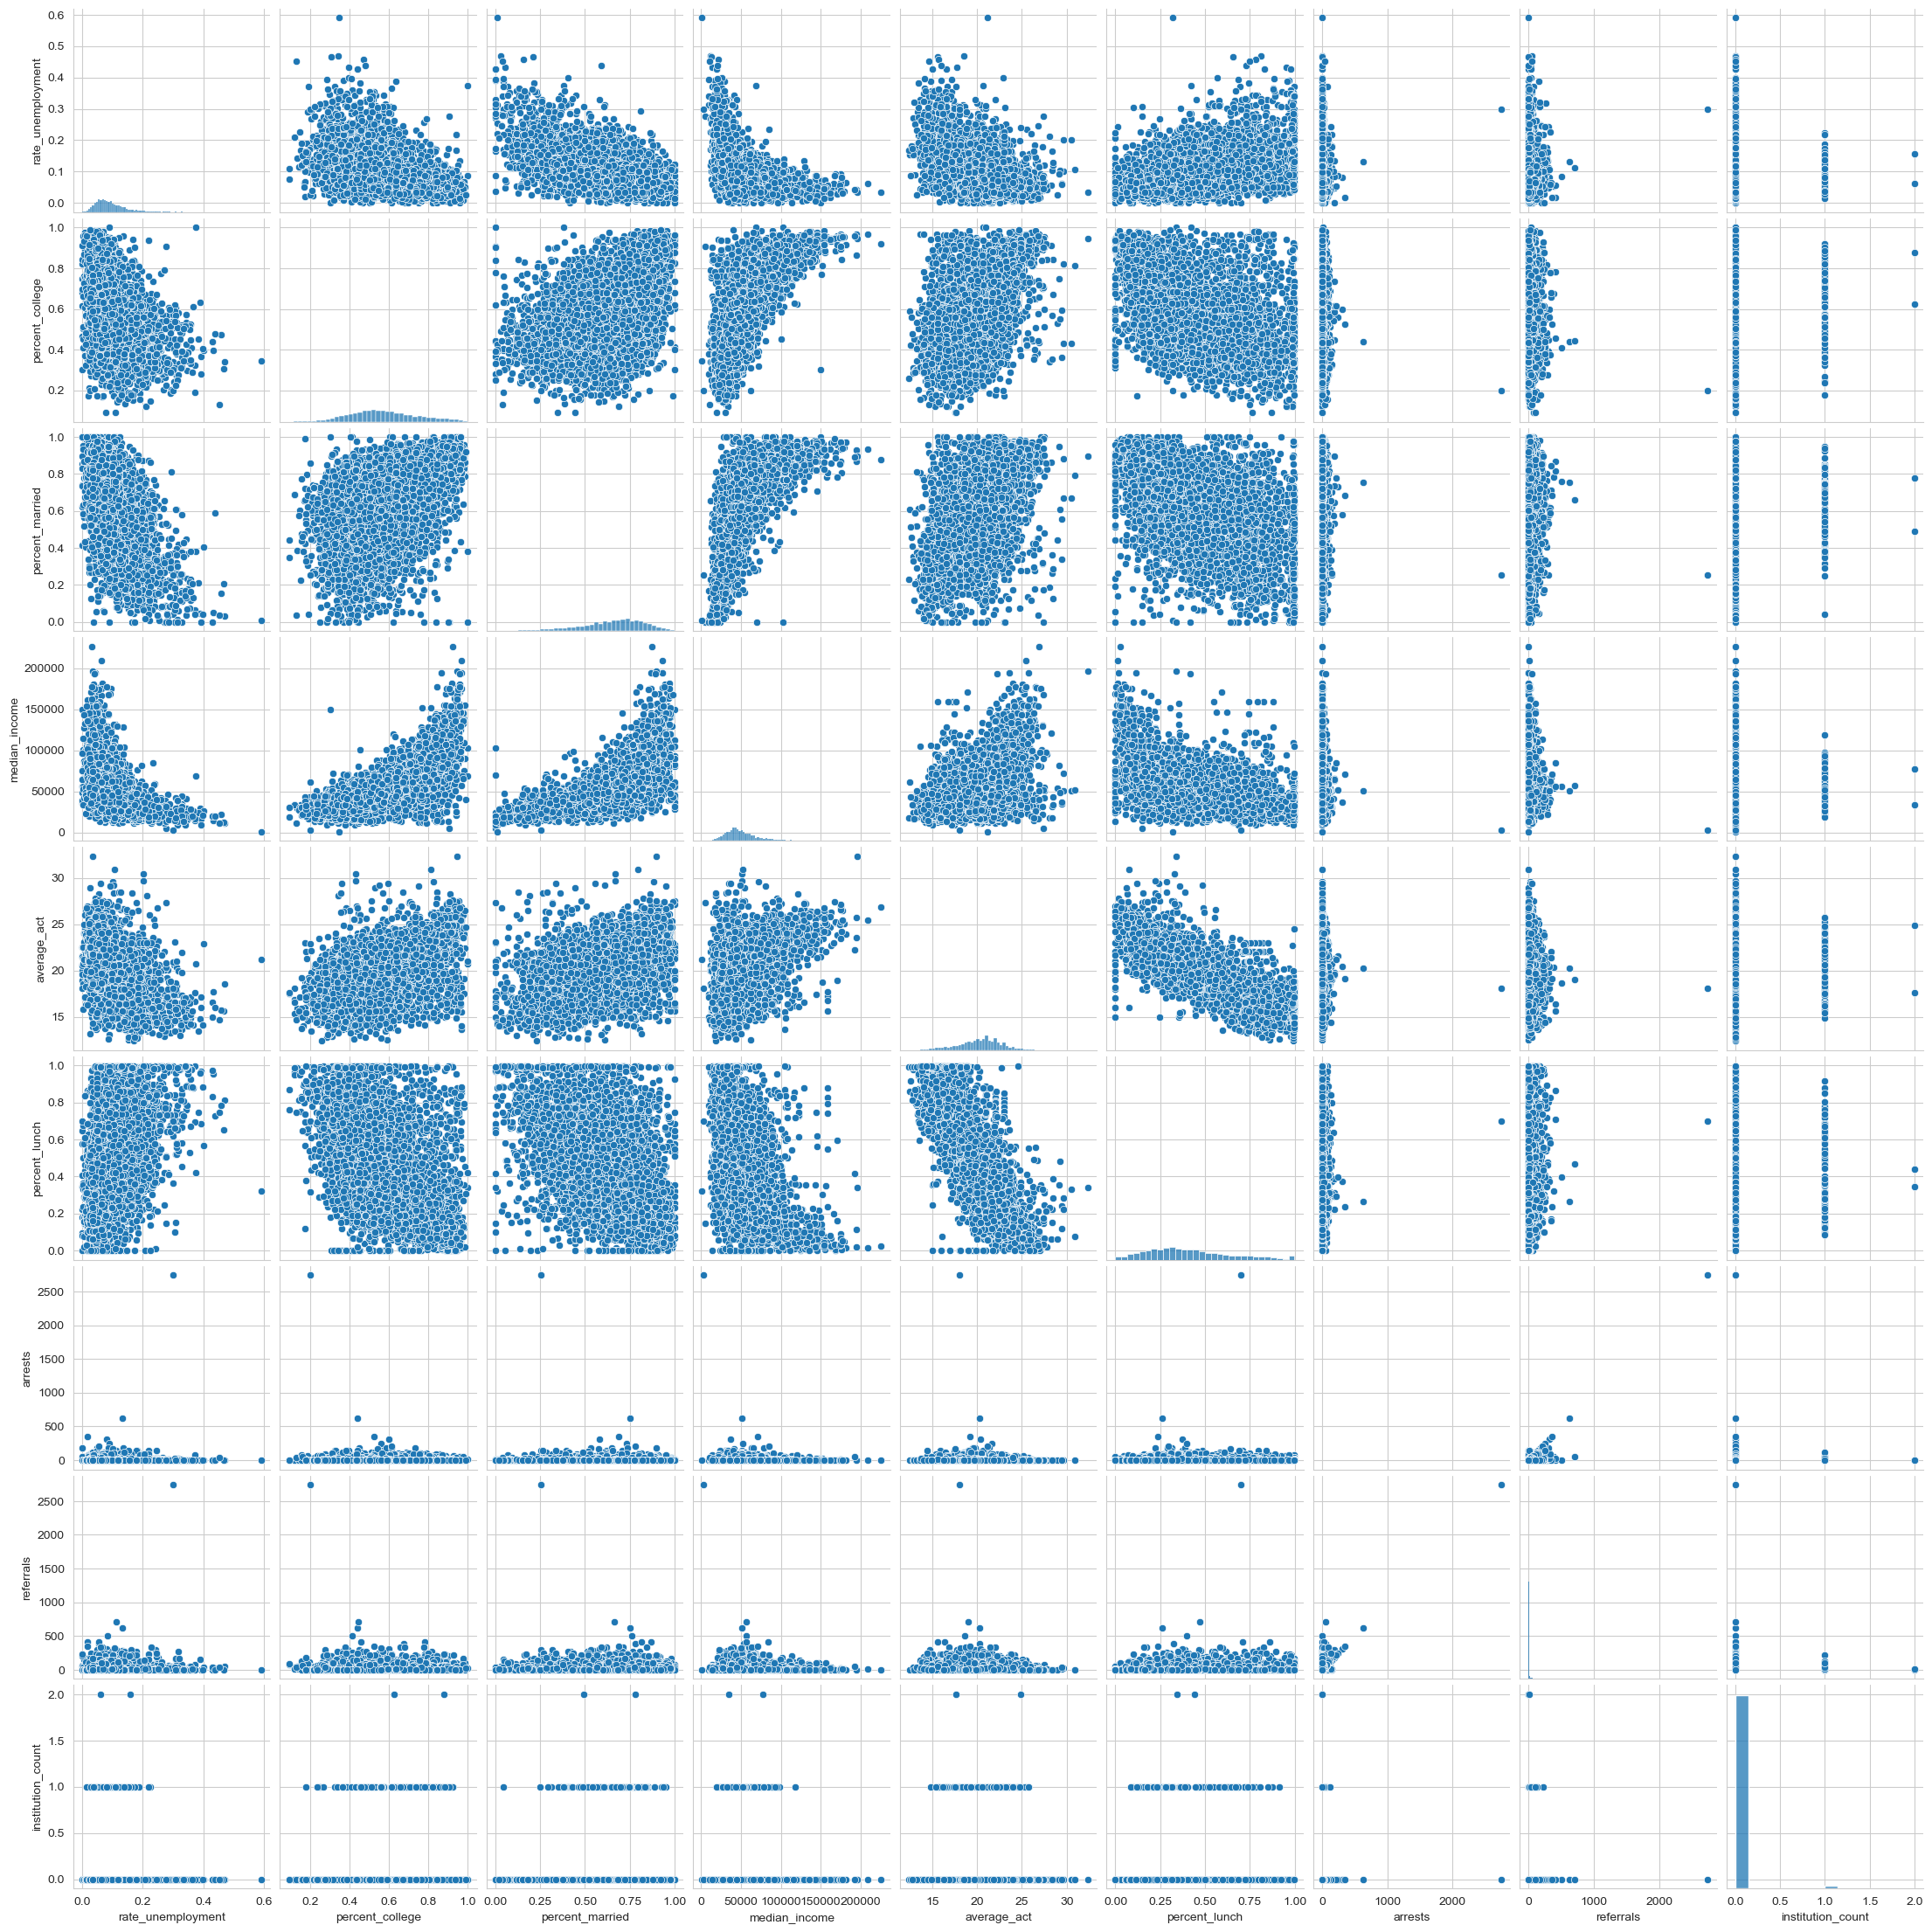

In [85]:
## begin with a pairplot
sns.pairplot(
    df_join.drop(columns=['id','sch_name','schid','combokey'])
    # drop this because it's just the ID, focus on the actual data
);
plt.show()

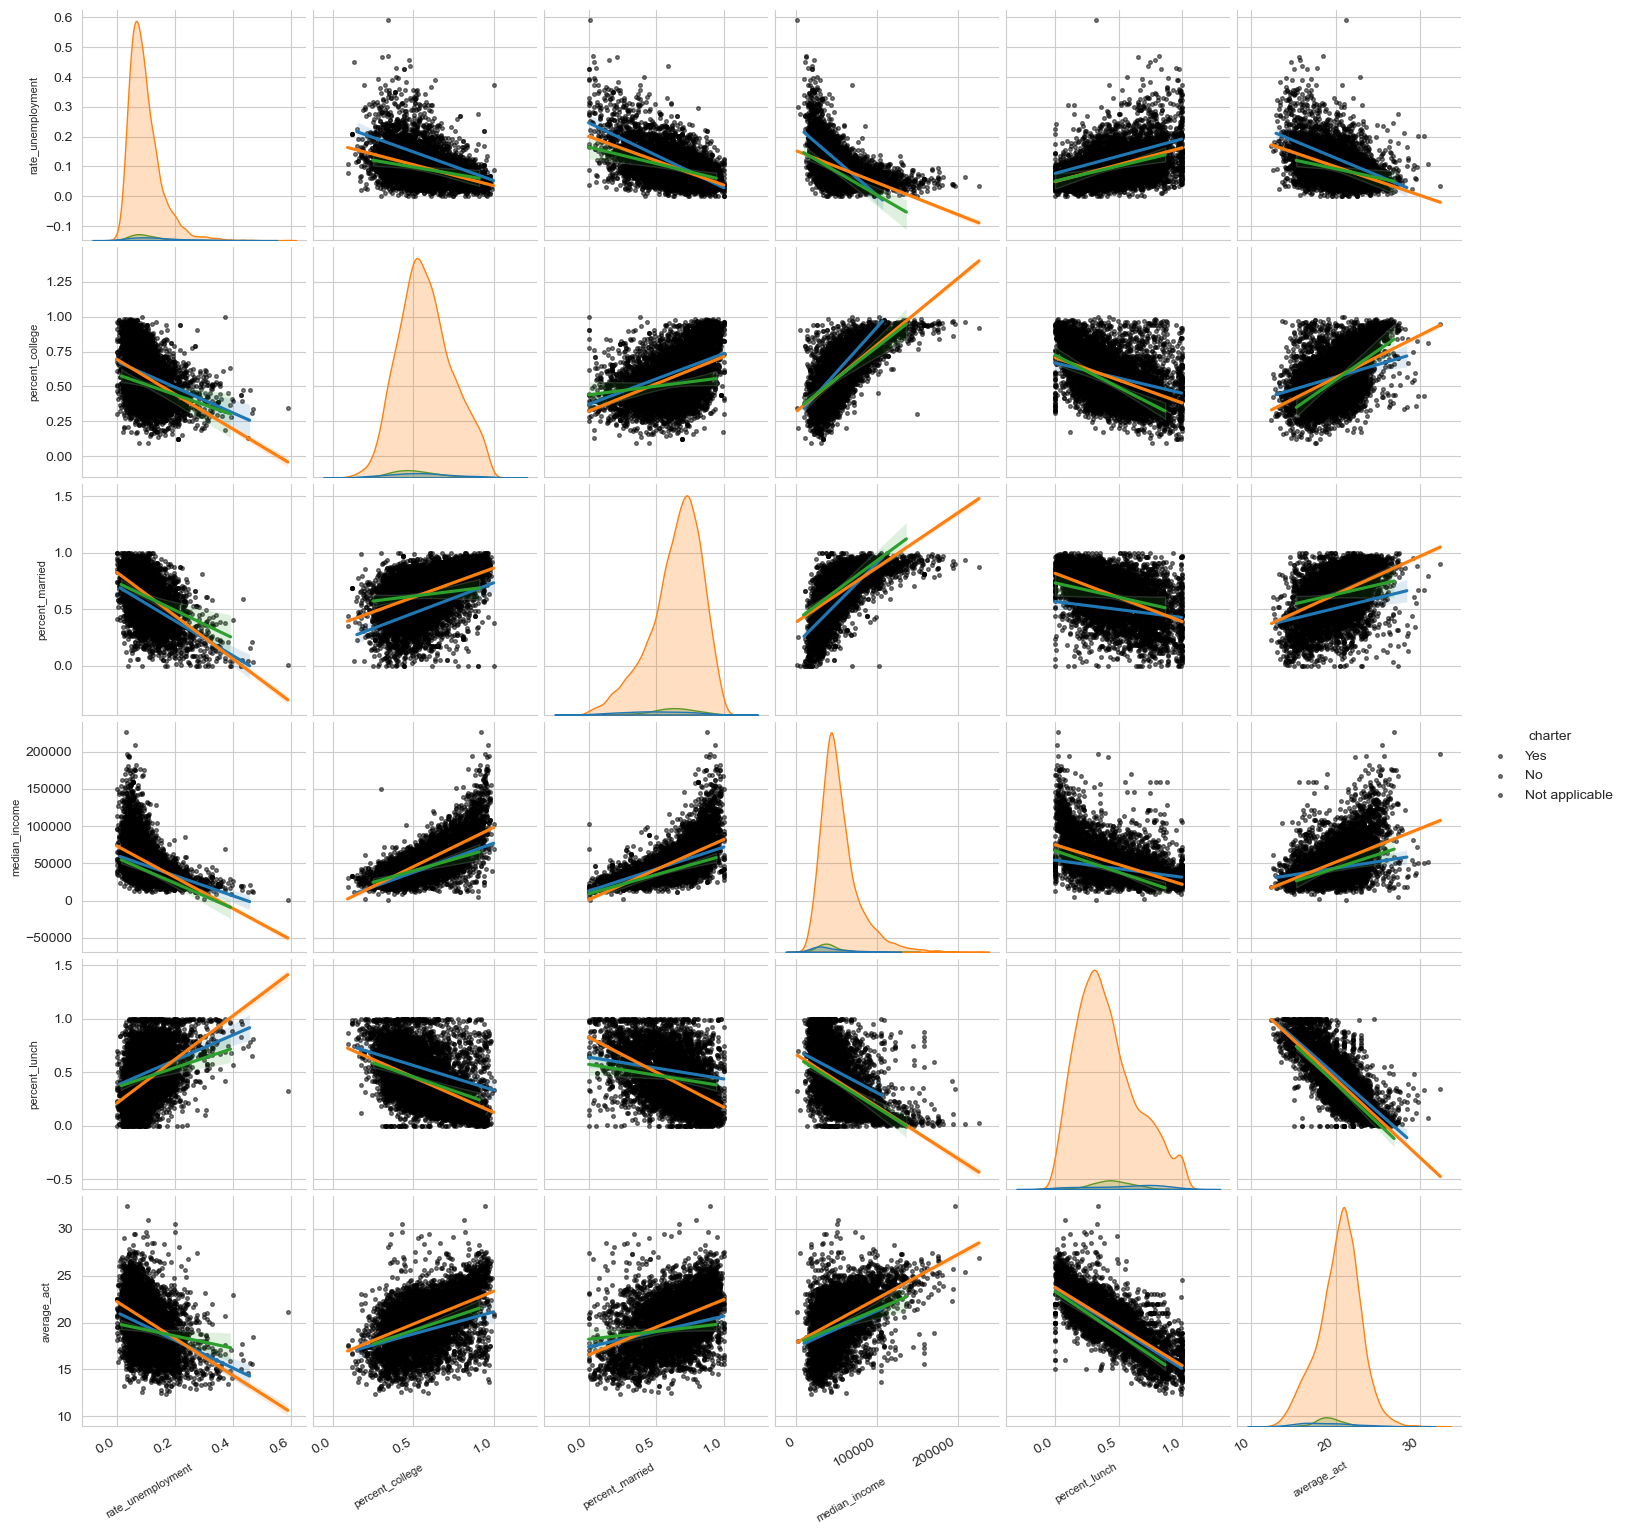

In [123]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

What's different here? first pair plot last time was raw. we've added the charter flag so we're separating the relationships based on charter school (yes no na) so we get 3 different regression lines and 3 different distributions

CLT: as you are adding up or averaging things, you'll eventually reach a normal distribution as you add up or average enough of them. Somethings will have skewed distributions like incomes.

Most likely will be fine without doing non linear transformations, mostly linear relationships

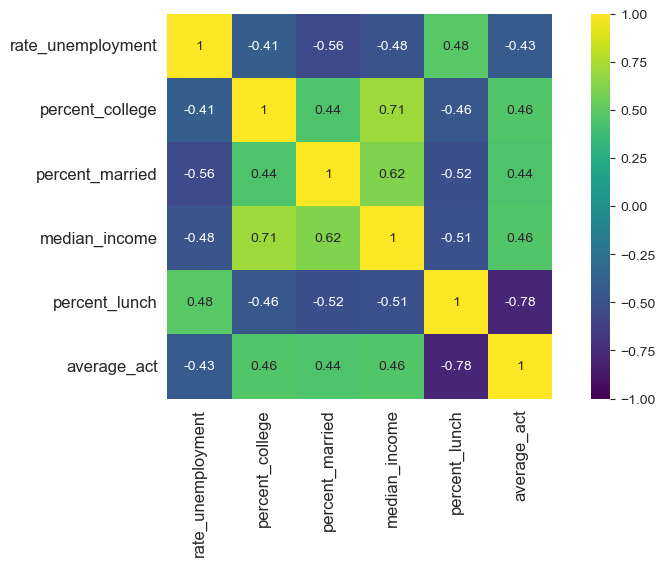

In [119]:
predictor_variables = ['rate_unemployment', 'percent_college', 'percent_married', 'median_income', 'percent_lunch', 'state', 'charter']

numerical_predictors = df[predictor_variables].select_dtypes(include='number').columns.to_list()

corr_matrix = df[numerical_predictors + ["average_act"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()

We are thinking about looking at individual input models first, then build up to a fuller model. We can also start with everything, put in all the predictors and see what is significant then shed down to a simplier model. We're trying to formalize what we're doing in a qualitative way when looking at the scatter plots. When we picked Median income as single input we're asking "do i have a relationship between these variables, how strong is that relationship?" by fitting a straight line we're formalizing that and getting a measure of how well it fits that score. Then by regressing through the simple linear regression / quadatric model we're asking in a formal way what the structure is -- does a straight line describe it or does it have a curve? it may not be completely obvious so by fitting different types of model we're doing that

thought process is the same as looking at a plot and exploring it, but in a more formal way.

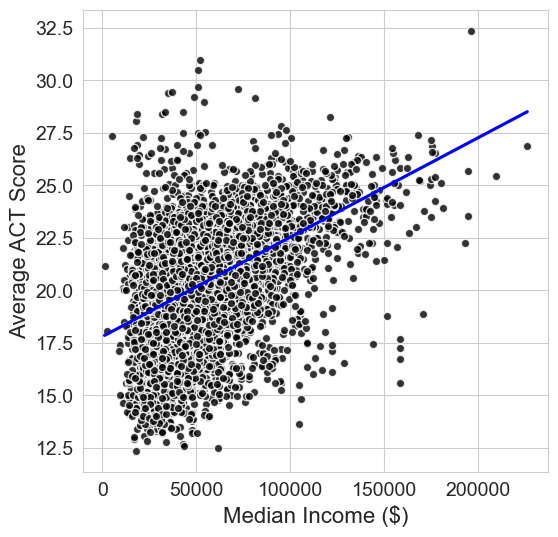

In [86]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color':'black','edgecolors':'white','linewidths':1})

# add axis labels
plt.xlabel('Median Income ($)',fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)

# increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

There is a relationship, and the simple linear regression is only a moderate fit

statsmodel liberary allows us to fit a model with a formula (specifying a relationship) or by passing the design matrices that include the response values and matrix of predictors. We will use the formula version, similiar syntax as R:

In [87]:
import statsmodels.formula.api as smf

model_median_income = smf.ols(formula='average_act ~ median_income', data=df).fit()

we're using stats model ordinary least squares function wiht the formula, specifying that average act is the response variable predicted by median income. we have fit the model to the entire dataframe


In [88]:
print(model_median_income.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     1934.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:17:52   Log-Likelihood:                -16043.
No. Observations:                7227   AIC:                         3.209e+04
Df Residuals:                    7225   BIC:                         3.210e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        17.8026      0.063    284.794

Coefficient on median income is very small because dollars goes over a much larger range than the range of ACT scores

we can look for the p values to see they're small and statistically significant

r2 value is .21 which is relatively low r2

we can do some things to numerically assess the fit 

In [89]:
model_median_income.rsquared

np.float64(0.21118648979300925)

Compute the RMSE (root mean square error)

In [90]:
y_hat = model_median_income.predict()
## here we're computing the predictions of the model, for the values of median income that were in the data set where we fit the model 

In [91]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df['average_act'],y_hat)).round(3)
## use numpy to get the sqrt of the mean squared error, calculated from scikitlearn

np.float64(2.228)

In [92]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['average_act'],y_hat)
## this is easier to compute, on average what was the error between the actual values and the model
## although the model was not perfect, that is relatively small error in terms of the range of scores for ACT

1.7129386980688552

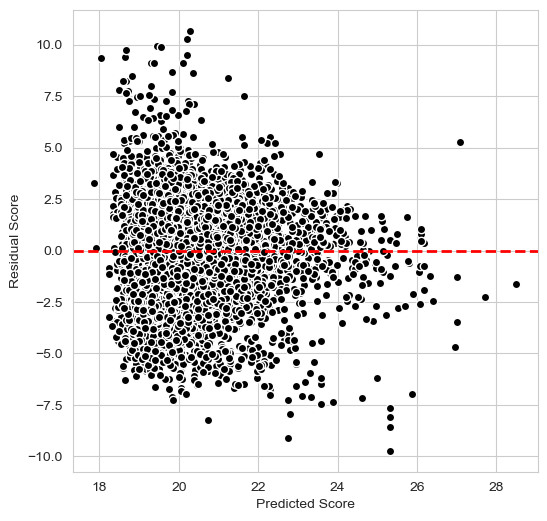

In [93]:
## graphical method, standard approach is residual plot
plt.figure(figsize=(6,6))

plt.plot(y_hat,model_median_income.resid,'ko',mec='w')
plt.axhline(0, color='r',linestyle='dashed',lw=2)

plt.xlabel('Predicted Score')
plt.ylabel('Residual Score')

plt.tick_params

plt.show()

If there is just a cloud of points with no strucutre, we've used our input variable as well as we can. but if we can identify a form, then an alternative model may be an improvement over what we're seeing. this is not just a cloud of points, so let's fit another model:

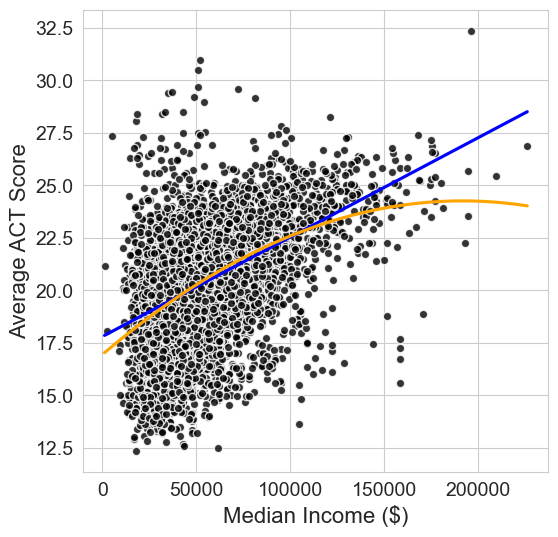

In [94]:
plt.figure(figsize=(6,6))

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            color='blue',
            ci=False,
            scatter_kws={'color':'black','edgecolors':'white','linewidths':1})

sns.regplot(data=df,
            x='median_income',
            y='average_act',
            order=2,
            color='orange',
            ci=False,
            scatter=False)

# add axis labels
plt.xlabel('Median Income ($)',fontsize=16)
plt.ylabel('Average ACT Score', fontsize=16)

# increase the fontsize of the tick labels
plt.tick_params(labelsize=14)

plt.show()

Original regression line, second with a quadradic regression line (order 2) in an orange line. Not clear that it iwll be significantly better but possible better fit 

In [95]:
model_median_income2 = smf.ols(
    formula='average_act ~ median_income + I(median_income**2)',
    data=df).fit()

Fit quadric model using stats models, but this time we added a squared version of median income I() indicates a separate term in this case the median income squared

In [96]:
model_median_income2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            average_act   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1013.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:17:55   Log-Likelihood:                -16007.
No. Observations:                7227   AIC:                         3.202e+04
Df Residuals:                    7224   BIC:                         3.204e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                16.9460      0.118    143.790      0.000      16.715      17.177
median_income           7.63e-05   3.55e-06     21.485      0.000    6.93e-05    8.33e-05
I(median_income ** 2)  -1.99e-10   2.33e-11     -8.557      0.000   -2.45e-10   -1.53e-10
==============================================================================
Omnibus:                      186.698   Durbin-Watson:                   1.302
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              395.543
Skew:                          -0.140   Prob(JB):                     1.29e-86
Kurtosis:                       4.111   Cond. No.                     2.27e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Look at fit summary and see that r2 is .219 very slightly higher than before and we can consider the coefficients and their significance. how much it improves the model is still unsure.

we have a significant quadradic term and a significant linear term

In [97]:
model_median_income2.pvalues

Intercept                0.000000e+00
median_income            2.631899e-99
I(median_income ** 2)    1.395848e-17
dtype: float64

we can also use an analysis of variance (anova) to compare the two nested polynomial linear regression model and ask if the more complicated model is significant difference to the simple model

In [98]:
from statsmodels.stats.anova import anova_lm


anova_lm(model_median_income,model_median_income2)

df_resid           ssr  df_diff     ss_diff          F        Pr(>F)
0    7225.0  35865.012794      0.0         NaN        NaN           NaN
1    7224.0  35505.105960      1.0  359.906834  73.227974  1.395848e-17

p value being quite small indicates there is a significant difference, and note that the pvalue is infact the same as the pvalue on the coefficient on the squared term which is just hte differnece between these two models

In [99]:
mean_absolute_error(df['average_act'],model_median_income2.predict())

1.6972389257635834

compare to prior:

In [100]:
mean_absolute_error(df['average_act'],model_median_income.predict())

1.7129386980688552

Smaller, but not THAT much smaller. Does have some predictive power, but relatively weak. A linear model is probably sufficient since quadradic doesn't make the fit immensely better

Notes from lecture:

* R2 gives me a measure of how well are performing in fitting the data, range of possible values is between 0 and 1, but we can actually have negative values if we doing such a poor job that even a wild guess is better than our model
* If we have something that is statistically significant, but a low R2 -- what does that mean? Statistical Significance just says "is there something there" beyond a cloud of noise. you may have something where there is a relationship but it isn't a great fit to the data alone. R2 is nice in that it is a normalized measure, doesn't matter what the scale of my values are, it provides a measure that is independent of the scales of our variables so we can interpret it in a nice way
* f-stat and prob associated with it, tell us about the significance of our model but in a single predictor model it's essentially the same as our coefficient and it's pvalue; in a multivariate it can help us understand overall model perofrmance
* AIC complexity / penalizing, we'll talk more about it later
* model performance should be concerned with how our model generalizes to new data, fit data to some portion and see how it does on some test data
* measure that help us consider the best model of differen complexity, how well does it do that wihtout adding additional complexity (to be talked about in future classes)
* When we understand the scale of the data, it can be really helpful to look at measure of accuracy in the scale of our data (MSE or RMSE) lookint at square root of average sq deviation of your points from prediction (RMSE) or mean abs error "on average, what is the deviation of the points from the model?"
* Note that if we fit quadric or cubic and keep going in that wya, the r2 will always get better and MSE will go down, but what i may be doing is just fitting noise that is in the data, that's why using a training/testing split can be helpful for penalizing model complexity with AIC. Don't get too excited about moderate improvements for much more complexity
  

# Multiple Linear Regression Model
fit all the variables (in this case the 5 socioeconomic variables) in the model, this will have no transformations but when I run this I may need to transform the data

In [101]:
model = smf.ols(
    formula = 'average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch'
    ,data=df).fit()


In [102]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2438.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:17:55   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.667e+04
Df Residuals:                    7221   BIC:                         2.671e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6972      0.13

Two inputs are not statistically significant, large pvalues for percent married and median income. we know that there are some correlations between our inputs so we won't need them all. the R2 is higher at .63

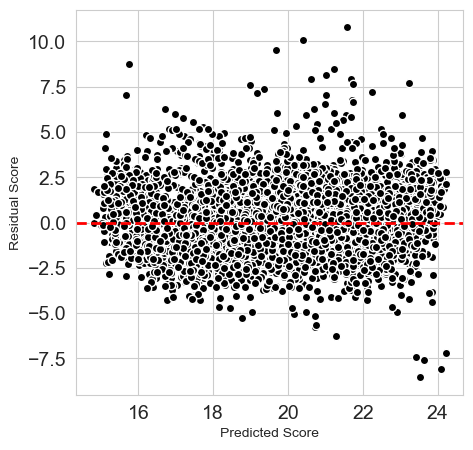

In [103]:
y_hat = model.predict()

plt.figure(figsize=(5,5))

plt.plot(y_hat, model.resid, 'ko',mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted Score')
plt.ylabel('Residual Score')

plt.tick_params(labelsize=14)

plt.show()

Relatively no structure to the plot so we're unlikely to make significant improvements by making transformations to the inputs used

In [104]:
mean_absolute_error(df['average_act'],model.predict())

1.1453304788883916

Less than any single variable model

computed linear regression models to estimate ACT scores to within 1 point, we believe there will be limited improvements by adding any transformations to the input variables. we also know that not all of the inputs were statistically significant, but that we could add other predictors to improve performance

Notes from class:
* Important to look at the coefficients in multivariate and specifically the sign (-/+) of them and ask yourself if that makes sense based on the relationship we have observed in the data
* Does it make sense that % married is negative? is it consistent with what we saw? this is another way of support our assessment of whether these coefficients are meaningful in the model. P Value will tell us statistical significance. Percent married doesn't make much sense being -, but the pvalue is .5 so it is clearly not relevant
* the relationships and correlations amoung the predictors gives us the possibility that we won't need all of them because the info from other predictors does the trick


# Reduced Model

After fitting the full multiple linear regression model and finding some coefficients were not significant, we will fit a reduced model with only significant coefficients and see if it is sufficient

In [105]:
model_reduced = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch'
    ,data=df).fit()

In [106]:
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:17:56   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.6400      0.10

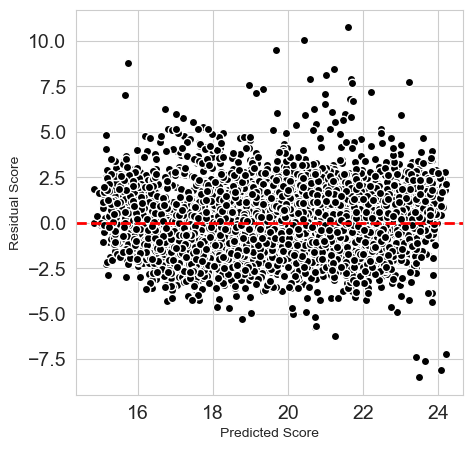

In [107]:
y_hat = model_reduced.predict()

plt.figure(figsize=(5,5))

plt.plot(y_hat, model_reduced.resid, 'ko',mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted Score')
plt.ylabel('Residual Score')

plt.tick_params(labelsize=14)

plt.show()

very similiar plot as to the full model

In [108]:
mae_full = mean_absolute_error(df['average_act'],model.predict())
mae_reduced = mean_absolute_error(df['average_act'],model_reduced.predict())

r2_full = model.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Abs Error': [mae_full,mae_reduced],'R-squared':[r2_full,r2_reduced]},
            index=['full model','reduced model']).round(4)

Mean Abs Error  R-squared
full model             1.1453     0.6280
reduced model          1.1455     0.6279

Essentially equivalent

In [109]:
anova_lm(model_reduced,model)

df_resid           ssr  df_diff   ss_diff         F    Pr(>F)
0    7223.0  16916.619167      0.0       NaN       NaN       NaN
1    7221.0  16915.612457      2.0  1.006711  0.214874  0.806648

there is no statistically significant difference between the reduced model and the larger model with the 5 variables. However we have not yet determined the feature importance of any individual input

Notes from class:
* using the p-values from the full model we get an indication of what we can remove. and removing them shows us that our reduced model was just as good as our full model and reduces complexity
* we check this by our R2 and retention of accuracy, the pvalues stayed small when we include only the reduced, coefficients themselves the signs all make sense, the residual plot looks like the same cloud of points, and the mae has not moved much

# Scaling

We will scale the predictors so they have a mean of 0 and std deviation of 1 so we can use the magnitude of the coefficients to compare the relative importance of each of those variables at contributing to our estimate of ACT Score

In [110]:
# transform variables then add the transformations as separate columns
predictor_variables= ['rate_unemployment','percent_college','percent_lunch']

In [111]:
scaled_columns = [var + '_normalized' for var in predictor_variables]
print(scaled_columns)

['rate_unemployment_normalized', 'percent_college_normalized', 'percent_lunch_normalized']


In [112]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(df[predictor_variables])

We learn our standard scaler then  apply to the predictor variables give each variable a mean of 0 and a std dev of 1 using the transform method. This is called 'scaling'

In [113]:
df[scaled_columns] = scaler.transform(df[predictor_variables])

In [114]:
df.head()

id  rate_unemployment  percent_college  percent_married  \
0  100001600143           0.117962         0.445283         0.346495   
1  100008000024           0.063984         0.662765         0.767619   
2  100008000225           0.056460         0.701864         0.713090   
3  100017000029           0.044739         0.692062         0.641283   
4  100018000040           0.077014         0.640060         0.834402   

   median_income  average_act  percent_lunch       year state zipcode  \
0        42820.0    20.433455       0.066901  2016-2017    DE   19804   
1        89320.0    19.498168       0.112412  2016-2017    DE   19709   
2        84140.0    19.554335       0.096816  2016-2017    DE   19709   
3        56500.0    17.737485       0.296960  2016-2017    DE   19958   
4        54015.0    18.245421       0.262641  2016-2017    DE   19934   

      school_type school_level charter                   sch_name    leaid  \
0  Regular School         High     Yes  DELAWARE MILITARY ACADEMY  1000016   
1  Regular School         High      No     MIDDLETOWN HIGH SCHOOL  1000080   
2  Regular School         High      No  APPOQUINIMINK HIGH SCHOOL  1000080   
3  Regular School         High      No  CAPE HENLOPEN HIGH SCHOOL  1000170   
4  Regular School         High      No  CAESAR RODNEY HIGH SCHOOL  1000180   

       schid  rate_unemployment_normalized  percent_college_normalized  \
0  1000143.0                      0.380125                   -0.774475   
1  1000024.0                     -0.573936                    0.544280   
2  1000225.0                     -0.706931                    0.781372   
3  1000029.0                     -0.914109                    0.721933   
4  1000040.0                     -0.343648                    0.406606   

   percent_lunch_normalized  
0                 -1.466983  
1                 -1.272689  
2                 -1.339271  
3                 -0.484817  
4                 -0.631332

Check and see if it worked

In [115]:
df[scaled_columns].agg(['mean','std']).round(3)

rate_unemployment_normalized  percent_college_normalized  \
mean                          -0.0                        -0.0   
std                            1.0                         1.0   

      percent_lunch_normalized  
mean                      -0.0  
std                        1.0

Now we can fit the multiple linear regression model with those normalized predictors

In [116]:
model_normalized = smf.ols(
    formula='average_act ~ rate_unemployment_normalized + percent_college_normalized + percent_lunch_normalized',
    data=df).fit()

In [117]:
print(model_normalized.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     4063.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        12:17:57   Log-Likelihood:                -13328.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7223   BIC:                         2.669e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

focus on the coefficients and their magnitutde, we have much larger coefficient for percent lunch variable now, this is saying for a one unit increase in my variable holding all else constant, what is the change in the prediction of our response variable? estimated change in ACT score is in much larger magnitude for a 1std dev change in percent lunch variable than the others

In [118]:
mae_normalized = mean_absolute_error(df['average_act'],model_normalized.predict())
mae_reduced = mean_absolute_error(df['average_act'],model_reduced.predict())

r2_normalized = model_normalized.rsquared
r2_reduced = model_reduced.rsquared

pd.DataFrame({'Mean Abs Error': [mae_normalized,mae_reduced],'R-squared':[r2_normalized,r2_reduced]},
            index=['full model','reduced model']).round(4)

Mean Abs Error  R-squared
full model             1.1455     0.6279
reduced model          1.1455     0.6279

The overall output is the same because the transformation from original predictors to standardized version doesn't change the linear regression model ,just changes what the coefficients are. While a scaling transformation is not required for multiple linear regression models, scaling helps us to interpret the relative importance of each predictor based on the magnitude of the estimated coefficients.

In summary, the percent of students at a school receiving free or reduced lunch was the strongest predictor in our analysis

# Evaluation

* Did you formulate the question in such a way that it addresses the original problem and can be answered with data?

"The purpose of the assignment is to perform work using the data science methodology to answer the question of whether school performance is predicted by socioeconomic factors." I think our question is fairly straightforward but maybe we can be more specific about what we are determining the relevant socioeconomic factors to be. Overall, it can be answered with data as long as we are clear about the limitations of our model
  
* Were there limitations in the quality of the data?

Yes, many. There is a huge bias we have not explored yet: schools that operate in areas that mandate the ACT will have a lower overall average score than those who only report ACT scores for students who willingly took the test. Students who are not required to, but do take the ACT or SAT are clearly college bound or at least hopeful college propspects. This means they have most likely done more preparation in their academic careers than students who do not have any intention to go to college or continue their studies. The geographical regions are also biased to the East/Sout with very few schools in the midwest or west

 
* Did the results (graphs, summaries, regression models) allow you to answer the question?

It gave us a good start, and can help explain the results for the population we have. More work is needed.


* Can you state quantitatively how well you can explain the average ACT score using the socioeconomic predictors?

I can quantitively state how much of the question each variable helps explain, but I do not have a full explanation for the population as a whole


* Which variable is the strongest predictor of the average ACT score?

So far it is percent_lunch, but I need to get more data to try and see if i can find other information since the data I brought in is too sparse to be useful


* Why might the percentage of students eligible for free or reduced price lunch be a stronger prediction than the median income?

Incomes are broad and vastly different, the purchasing power of them is also highly dependent on the region. Free and reduced lunch limits are set by the U.S. Department of Agriculture (USDA) using annual federal income poverty guidelines, which are adjusted for household size. Schools compare a household's total income to these guidelines to determine eligibility: families at or below 130% of the poverty level qualify for free meals, while those between 130% and 185% of the poverty level qualify for reduced-price meals. This means that it is slightly more tailored to the experience of the family, considering two equal median incomes produce different lifestyles for a family with one child vs a family with five children

### Adding Charter School

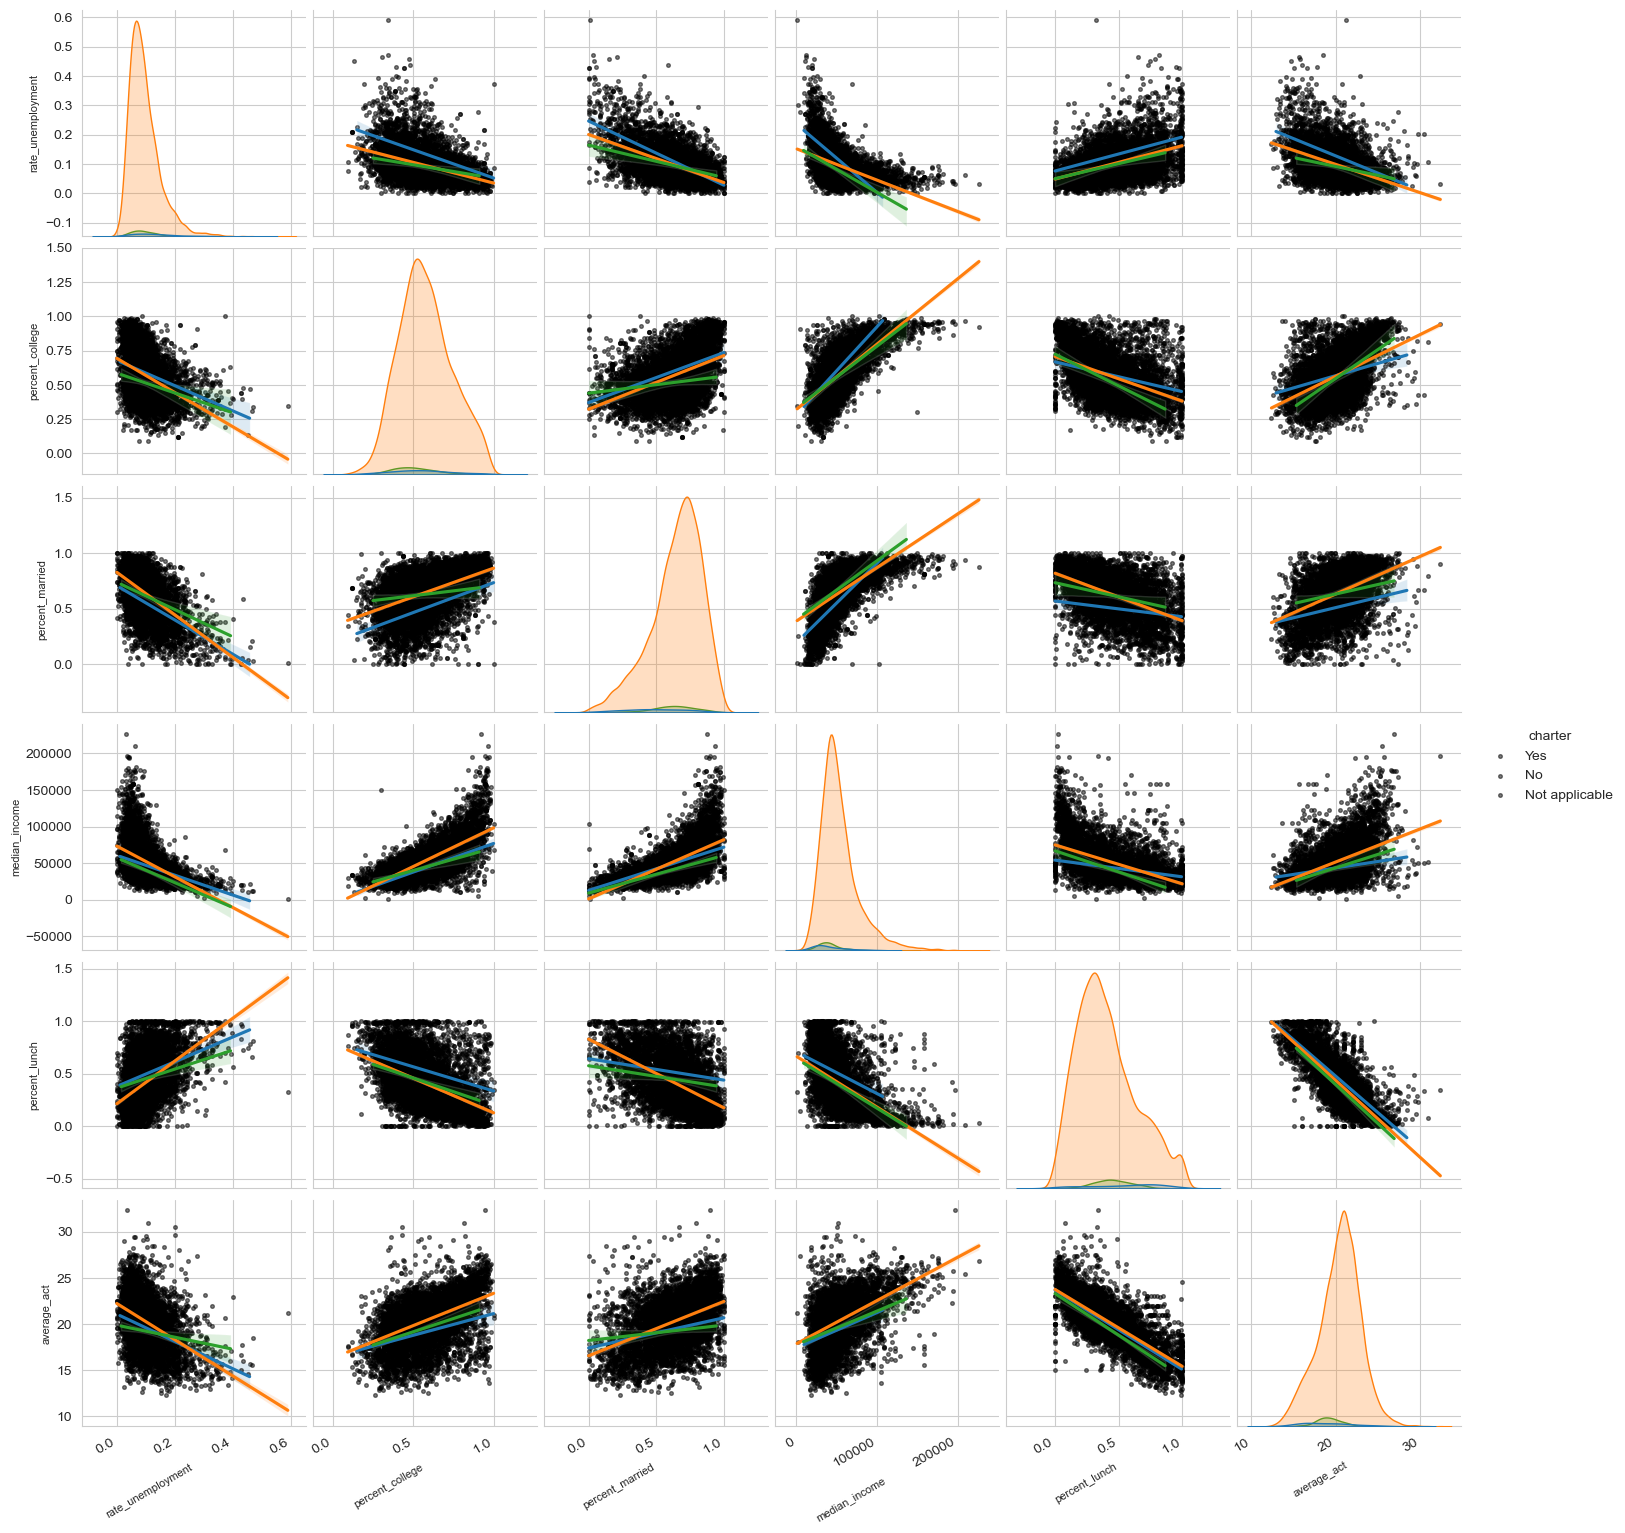

In [124]:
fig = sns.pairplot(
    data=df,
    vars=numerical_predictors + ['average_act'],
    hue='charter',
    kind="reg",
    plot_kws={"scatter_kws": {"alpha": 0.5, "color": "k", "s": 7},
    },
)

for ax in fig.axes.flat:
    if ax.get_xlabel() == 'CT Median Household Income':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))  # Apply scientific notation
    ax.set_xlabel(ax.get_xlabel(), fontsize=8, rotation=30, ha='right')  # X-axis label size and rotation
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)  # Y-axis label size

    # Rotate x-axis tick labels
    plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

Categorical data needs to be transformed in a way that makes sense to apply a coefficient, we do this with dummy variables, 0 or 1, depending on whether a particular category exists or not

In [125]:
model_charter = smf.ols(
    formula='average_act ~ rate_unemployment + percent_college + percent_lunch + C(charter)',
    data=df).fit()

In [126]:
print(model_charter.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     2459.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:28:45   Log-Likelihood:                -13308.
No. Observations:                7227   AIC:                         2.663e+04
Df Residuals:                    7221   BIC:                         2.667e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

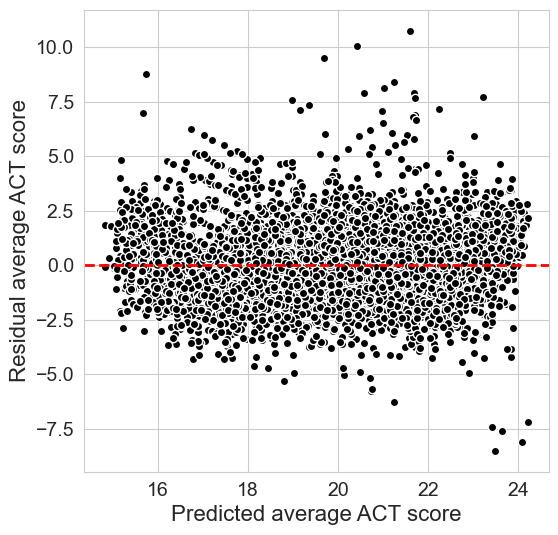

In [127]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_charter.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

In [128]:
mean_absolute_error(df['average_act'], model_charter.predict())

1.1404114515708754

Create a model where the intercept and slope can vary between schools based on charter school status

In [129]:
model_charter2 = smf.ols(formula='average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(charter)', data=df).fit()

In [130]:
print(model_charter2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     1120.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:29:50   Log-Likelihood:                -13301.
No. Observations:                7227   AIC:                         2.663e+04
Df Residuals:                    7215   BIC:                         2.671e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

Use a residual plot for graphical assessment of model fit

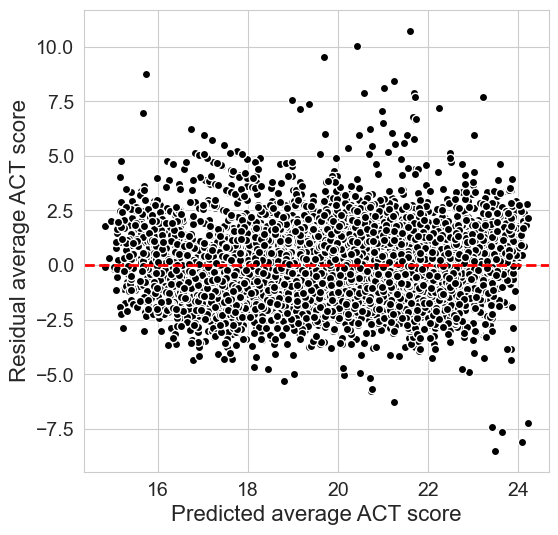

In [131]:
plt.figure(figsize=(6,6))

plt.plot(y_hat, model_charter2.resid, 'ko', mec='w')
plt.axhline(0, color='r', linestyle='dashed', lw=2)

plt.xlabel('Predicted average ACT score', fontsize=16)
plt.ylabel('Residual average ACT score', fontsize=16)

plt.tick_params(labelsize=14)

plt.show()

Use an ANOVA to test the significance of difference between models

In [132]:
anova_lm(model_charter, model_charter2)

df_resid           ssr  df_diff    ss_diff         F    Pr(>F)
0    7221.0  16821.669533      0.0        NaN       NaN       NaN
1    7215.0  16789.186717      6.0  32.482816  2.326532  0.030205

In [133]:
mean_absolute_error(df['average_act'], model_charter2.predict())

1.139733428612037

In [134]:
mean_absolute_error(df['average_act'], model_charter.predict())

1.1404114515708754

### Try a limited model using predictors with significant coefficients
Create a design matrix with all predictors

In [135]:
from patsy import dmatrices

In [136]:
y, X_design = dmatrices('average_act ~ (rate_unemployment + percent_college + percent_lunch) * C(charter)',
                        data=df,
                        return_type='dataframe'
                        )

In [137]:
X_design.head()

Intercept  C(charter)[T.Not applicable]  C(charter)[T.Yes]  \
0        1.0                           0.0                1.0   
1        1.0                           0.0                0.0   
2        1.0                           0.0                0.0   
3        1.0                           0.0                0.0   
4        1.0                           0.0                0.0   

   rate_unemployment  rate_unemployment:C(charter)[T.Not applicable]  \
0           0.117962                                             0.0   
1           0.063984                                             0.0   
2           0.056460                                             0.0   
3           0.044739                                             0.0   
4           0.077014                                             0.0   

   rate_unemployment:C(charter)[T.Yes]  percent_college  \
0                             0.117962         0.445283   
1                             0.000000         0.662765   
2                             0.000000         0.701864   
3                             0.000000         0.692062   
4                             0.000000         0.640060   

   percent_college:C(charter)[T.Not applicable]  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   percent_college:C(charter)[T.Yes]  percent_lunch  \
0                           0.445283       0.066901   
1                           0.000000       0.112412   
2                           0.000000       0.096816   
3                           0.000000       0.296960   
4                           0.000000       0.262641   

   percent_lunch:C(charter)[T.Not applicable]  percent_lunch:C(charter)[T.Yes]  
0                                         0.0                         0.066901  
1                                         0.0                         0.000000  
2                                         0.0                         0.000000  
3                                         0.0                         0.000000  
4                                         0.0                         0.000000

Keep only significant predictors from the full model

In [138]:
X = X_design.loc[:, model_charter2.pvalues<0.05]

print(X.columns)

Index(['Intercept', 'C(charter)[T.Yes]', 'rate_unemployment',
       'rate_unemployment:C(charter)[T.Yes]', 'percent_college',
       'percent_college:C(charter)[T.Yes]', 'percent_lunch'],
      dtype='object')


In [141]:
model_charter3 = sm.OLS(y, X).fit()

In [142]:
print(model_charter3.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2036.
Date:                Sat, 18 Oct 2025   Prob (F-statistic):               0.00
Time:                        13:33:30   Log-Likelihood:                -13322.
No. Observations:                7227   AIC:                         2.666e+04
Df Residuals:                    7220   BIC:                         2.671e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [143]:
mean_absolute_error(df['average_act'], model_charter3.predict())

1.1451732954719172

In [144]:
mean_absolute_error(df['average_act'], model_charter2.predict())

1.139733428612037

In [145]:
mean_absolute_error(df['average_act'], model_charter.predict())

1.1404114515708754

1. Whether a school is a charter school or not can have a statistically significant, but practically small impact on the model.

### Identify outliers

We can use the interquartile range to identify outliers. This is also evident in boxplots of the data. Median income is on a very different scale than the other predictors, so we will make two plots to explore the data.

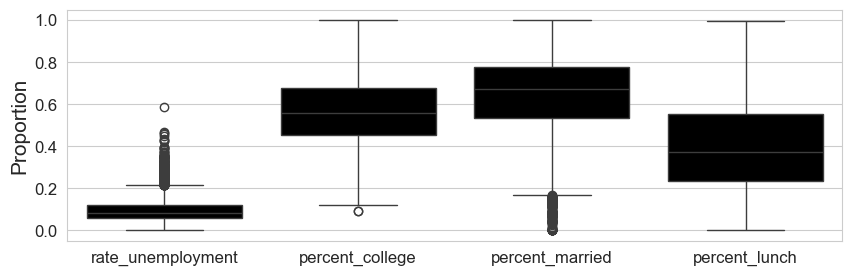

In [121]:
plt.figure(figsize=(10,3))

fractions = list(numerical_predictors)
fractions.remove('median_income')

sns.boxplot(data=df[fractions], color='k')

plt.ylabel('Proportion', fontsize=15)

plt.tick_params(labelsize=12)

plt.show()

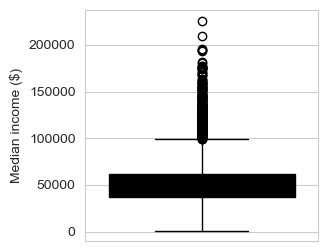

In [122]:
plt.figure(figsize=(3,3))

sns.boxplot(data=df, y='median_income', color='k')

plt.ylabel('Median income ($)')

plt.show()

1.  The numerical predictors are related to `average_act`. The relationships appear roughly linear.

2.  The numerical predictors are correlated with each other, suggesting that not all predictors will be necessary.

3.  Some variables have skewed distributions, suggesting that transformations of input variables might be useful.

4. There are outliers in `rate_unemployment`, `percent_college`, `percent_married` and `median_income`. None of these are obviously incorrect values; they likely reflect skewed distributions. We may consider applying something like a log transformation to these predictors as we explore different models.

5. The relationships are similar across charter and non-charter schools, but might be significantly different.